In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import auc,roc_curve

from sklearn.externals import joblib
import lightgbm as lgb

from imblearn.under_sampling import RandomUnderSampler,CondensedNearestNeighbour
from imblearn.over_sampling import RandomOverSampler,SMOTE

from random import random

import matplotlib.pyplot as plt
%matplotlib inline

nrow = 50000
number_of_time = 15

In [2]:
train = pd.read_csv('../data/train.csv',nrows=nrow)
train.drop('ID_code',inplace= True,axis=1)

In [3]:
y = pd.DataFrame(train['target'])
sc = MinMaxScaler()
x = pd.DataFrame(sc.fit_transform(train.drop('target',axis=1)),columns=train.columns[1:])

In [12]:
def data_augmentation(x,y,low_class_ratio = 0.2,method = 'none'):
    if method == 'random_under_sample':
        sm = RandomUnderSampler(sampling_strategy=1-low_class_ratio)
        aug_x,aug_y = sm.fit_resample(x,y)
    elif method == 'random_over_sample':
        sm = RandomOverSampler(sampling_strategy=1-low_class_ratio)
        aug_x,aug_y = sm.fit_resample(x,y)
    elif method == 'smote':
        sm = SMOTE(sampling_strategy=1-low_class_ratio,m_neighbors=10,kind='svm')
        aug_x,aug_y = sm.fit_resample(x,y)
    else:
        aug_x = x
        aug_y = y
    
    return(pd.DataFrame(aug_x,columns=x.columns),pd.DataFrame(aug_y,columns=['target']))

In [5]:
test = pd.read_csv('../data/test.csv')
sub = pd.DataFrame()
sub['ID_code'] = test['ID_code']
test.drop('ID_code',axis=1,inplace=True)
test_x = sc.transform(test)
#train,test = train_test_split(train,test_size = 0.3)

In [32]:
train_x = train.drop('target',axis=1).reset_index(drop=True)
train_y = pd.DataFrame(train['target']).reset_index(drop=True)

In [14]:
#predict and combine
pred = np.zeros((test.shape[0]))
for i in range(number_of_time):
    model = k_fold_train(x,y,'random_over_sample',random()/2.5)
    pred = pred + model.predict(test_x)

pred = pred/number_of_time

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.57687
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.630772
[3]	valid_0's auc: 0.658877
[4]	valid_0's auc: 0.660858
[5]	valid_0's auc: 0.673374
[6]	valid_0's auc: 0.689708
[7]	valid_0's auc: 0.703794
[8]	valid_0's auc: 0.701759
[9]	valid_0's auc: 0.714665
[10]	valid_0's auc: 0.724035
[11]	valid_0's auc: 0.728587
[12]	valid_0's auc: 0.743566
[13]	valid_0's auc: 0.751688
[14]	valid_0's auc: 0.759072
[15]	valid_0's auc: 0.764022
[16]	valid_0's auc: 0.766514
[17]	valid_0's auc: 0.768264
[18]	valid_0's auc: 0.7769
[19]	valid_0's auc: 0.7782
[20]	valid_0's auc: 0.779795
[21]	valid_0's auc: 0.780115
[22]	valid_0's auc: 0.782618
[23]	valid_0's auc: 0.781963
[24]	valid_0's auc: 0.786389
[25]	valid_0's auc: 0.787115
[26]	valid_0's auc: 0.792097
[27]	valid_0's auc: 0.794748
[28]	valid_0's auc: 0.798763
[29]	valid_0's auc: 0.798375
[30]	valid_0's auc: 0.800279
[31]	valid_0's auc: 0.802368
[32]	valid_0's auc: 0.802319
[33]	valid_0's auc: 0.8

[301]	valid_0's auc: 0.876934
[302]	valid_0's auc: 0.876819
[303]	valid_0's auc: 0.876924
[304]	valid_0's auc: 0.87699
[305]	valid_0's auc: 0.877159
[306]	valid_0's auc: 0.87727
[307]	valid_0's auc: 0.877288
[308]	valid_0's auc: 0.877361
[309]	valid_0's auc: 0.877476
[310]	valid_0's auc: 0.877286
[311]	valid_0's auc: 0.877246
[312]	valid_0's auc: 0.877237
[313]	valid_0's auc: 0.877269
[314]	valid_0's auc: 0.877331
[315]	valid_0's auc: 0.877318
[316]	valid_0's auc: 0.877231
[317]	valid_0's auc: 0.877296
[318]	valid_0's auc: 0.877262
[319]	valid_0's auc: 0.877218
[320]	valid_0's auc: 0.877358
[321]	valid_0's auc: 0.877405
[322]	valid_0's auc: 0.877534
[323]	valid_0's auc: 0.877616
[324]	valid_0's auc: 0.877728
[325]	valid_0's auc: 0.877901
[326]	valid_0's auc: 0.878033
[327]	valid_0's auc: 0.878269
[328]	valid_0's auc: 0.87825
[329]	valid_0's auc: 0.878275
[330]	valid_0's auc: 0.878379
[331]	valid_0's auc: 0.878461
[332]	valid_0's auc: 0.878586
[333]	valid_0's auc: 0.878622
[334]	valid_0

[598]	valid_0's auc: 0.883791
[599]	valid_0's auc: 0.883802
[600]	valid_0's auc: 0.883904
[601]	valid_0's auc: 0.883951
[602]	valid_0's auc: 0.883938
[603]	valid_0's auc: 0.88389
[604]	valid_0's auc: 0.883834
[605]	valid_0's auc: 0.883917
[606]	valid_0's auc: 0.883904
[607]	valid_0's auc: 0.883952
[608]	valid_0's auc: 0.883972
[609]	valid_0's auc: 0.883951
[610]	valid_0's auc: 0.883964
[611]	valid_0's auc: 0.883987
[612]	valid_0's auc: 0.884029
[613]	valid_0's auc: 0.883991
[614]	valid_0's auc: 0.884016
[615]	valid_0's auc: 0.88407
[616]	valid_0's auc: 0.884116
[617]	valid_0's auc: 0.884041
[618]	valid_0's auc: 0.884087
[619]	valid_0's auc: 0.884195
[620]	valid_0's auc: 0.884194
[621]	valid_0's auc: 0.884162
[622]	valid_0's auc: 0.884193
[623]	valid_0's auc: 0.884126
[624]	valid_0's auc: 0.884185
[625]	valid_0's auc: 0.884141
[626]	valid_0's auc: 0.884085
[627]	valid_0's auc: 0.884115
[628]	valid_0's auc: 0.884174
[629]	valid_0's auc: 0.884247
[630]	valid_0's auc: 0.884226
[631]	valid_

[877]	valid_0's auc: 0.885225
[878]	valid_0's auc: 0.885264
[879]	valid_0's auc: 0.885276
[880]	valid_0's auc: 0.8853
[881]	valid_0's auc: 0.885335
[882]	valid_0's auc: 0.885321
[883]	valid_0's auc: 0.885295
[884]	valid_0's auc: 0.885313
[885]	valid_0's auc: 0.88536
[886]	valid_0's auc: 0.88542
[887]	valid_0's auc: 0.885424
[888]	valid_0's auc: 0.88547
[889]	valid_0's auc: 0.885388
[890]	valid_0's auc: 0.885414
[891]	valid_0's auc: 0.885485
[892]	valid_0's auc: 0.885499
[893]	valid_0's auc: 0.885578
[894]	valid_0's auc: 0.88558
[895]	valid_0's auc: 0.885542
[896]	valid_0's auc: 0.885578
[897]	valid_0's auc: 0.885643
[898]	valid_0's auc: 0.885686
[899]	valid_0's auc: 0.885685
[900]	valid_0's auc: 0.885751
[901]	valid_0's auc: 0.885742
[902]	valid_0's auc: 0.885793
[903]	valid_0's auc: 0.885784
[904]	valid_0's auc: 0.885778
[905]	valid_0's auc: 0.885818
[906]	valid_0's auc: 0.885813
[907]	valid_0's auc: 0.885817
[908]	valid_0's auc: 0.885827
[909]	valid_0's auc: 0.885817
[910]	valid_0's 

[1148]	valid_0's auc: 0.885364
[1149]	valid_0's auc: 0.885361
[1150]	valid_0's auc: 0.88538
[1151]	valid_0's auc: 0.885378
[1152]	valid_0's auc: 0.885394
[1153]	valid_0's auc: 0.885384
[1154]	valid_0's auc: 0.885441
[1155]	valid_0's auc: 0.885489
[1156]	valid_0's auc: 0.885522
[1157]	valid_0's auc: 0.885556
[1158]	valid_0's auc: 0.8855
[1159]	valid_0's auc: 0.885518
[1160]	valid_0's auc: 0.885502
[1161]	valid_0's auc: 0.885494
[1162]	valid_0's auc: 0.885488
[1163]	valid_0's auc: 0.885483
[1164]	valid_0's auc: 0.885494
[1165]	valid_0's auc: 0.885492
[1166]	valid_0's auc: 0.885491
[1167]	valid_0's auc: 0.885489
[1168]	valid_0's auc: 0.885523
[1169]	valid_0's auc: 0.885527
[1170]	valid_0's auc: 0.885515
[1171]	valid_0's auc: 0.885519
[1172]	valid_0's auc: 0.885497
[1173]	valid_0's auc: 0.885512
[1174]	valid_0's auc: 0.885491
[1175]	valid_0's auc: 0.885523
[1176]	valid_0's auc: 0.885539
[1177]	valid_0's auc: 0.885549
[1178]	valid_0's auc: 0.885593
[1179]	valid_0's auc: 0.885571
[1180]	vali

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.582196
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.634946
[3]	valid_0's auc: 0.658661
[4]	valid_0's auc: 0.659846
[5]	valid_0's auc: 0.674421
[6]	valid_0's auc: 0.690712
[7]	valid_0's auc: 0.69971
[8]	valid_0's auc: 0.700249
[9]	valid_0's auc: 0.710738
[10]	valid_0's auc: 0.721715
[11]	valid_0's auc: 0.723923
[12]	valid_0's auc: 0.740472
[13]	valid_0's auc: 0.749281
[14]	valid_0's auc: 0.759046
[15]	valid_0's auc: 0.763083
[16]	valid_0's auc: 0.766497
[17]	valid_0's auc: 0.768783
[18]	valid_0's auc: 0.776736
[19]	valid_0's auc: 0.778239
[20]	valid_0's auc: 0.779378
[21]	valid_0's auc: 0.780762
[22]	valid_0's auc: 0.782003
[23]	valid_0's auc: 0.780171
[24]	valid_0's auc: 0.783557
[25]	valid_0's auc: 0.785014
[26]	valid_0's auc: 0.791485
[27]	valid_0's auc: 0.795217
[28]	valid_0's auc: 0.797231
[29]	valid_0's auc: 0.798267
[30]	valid_0's auc: 0.799253
[31]	valid_0's auc: 0.80139
[32]	valid_0's auc: 0.800683
[33]	valid_0's auc: 

[329]	valid_0's auc: 0.877756
[330]	valid_0's auc: 0.878048
[331]	valid_0's auc: 0.878109
[332]	valid_0's auc: 0.878224
[333]	valid_0's auc: 0.878185
[334]	valid_0's auc: 0.878158
[335]	valid_0's auc: 0.878145
[336]	valid_0's auc: 0.878072
[337]	valid_0's auc: 0.87818
[338]	valid_0's auc: 0.87815
[339]	valid_0's auc: 0.878163
[340]	valid_0's auc: 0.878179
[341]	valid_0's auc: 0.878021
[342]	valid_0's auc: 0.878029
[343]	valid_0's auc: 0.877995
[344]	valid_0's auc: 0.877986
[345]	valid_0's auc: 0.877747
[346]	valid_0's auc: 0.877715
[347]	valid_0's auc: 0.877771
[348]	valid_0's auc: 0.87787
[349]	valid_0's auc: 0.8779
[350]	valid_0's auc: 0.877941
[351]	valid_0's auc: 0.877893
[352]	valid_0's auc: 0.877969
[353]	valid_0's auc: 0.877946
[354]	valid_0's auc: 0.877824
[355]	valid_0's auc: 0.877801
[356]	valid_0's auc: 0.877721
[357]	valid_0's auc: 0.877718
[358]	valid_0's auc: 0.877654
[359]	valid_0's auc: 0.877606
[360]	valid_0's auc: 0.877798
[361]	valid_0's auc: 0.8779
[362]	valid_0's a

[626]	valid_0's auc: 0.882081
[627]	valid_0's auc: 0.882067
[628]	valid_0's auc: 0.882159
[629]	valid_0's auc: 0.882119
[630]	valid_0's auc: 0.882165
[631]	valid_0's auc: 0.882188
[632]	valid_0's auc: 0.882219
[633]	valid_0's auc: 0.88226
[634]	valid_0's auc: 0.882304
[635]	valid_0's auc: 0.882347
[636]	valid_0's auc: 0.882433
[637]	valid_0's auc: 0.882432
[638]	valid_0's auc: 0.882444
[639]	valid_0's auc: 0.882436
[640]	valid_0's auc: 0.882452
[641]	valid_0's auc: 0.882445
[642]	valid_0's auc: 0.88248
[643]	valid_0's auc: 0.882565
[644]	valid_0's auc: 0.882484
[645]	valid_0's auc: 0.882516
[646]	valid_0's auc: 0.8825
[647]	valid_0's auc: 0.882632
[648]	valid_0's auc: 0.882676
[649]	valid_0's auc: 0.882728
[650]	valid_0's auc: 0.882691
[651]	valid_0's auc: 0.88272
[652]	valid_0's auc: 0.882731
[653]	valid_0's auc: 0.882717
[654]	valid_0's auc: 0.882657
[655]	valid_0's auc: 0.882719
[656]	valid_0's auc: 0.882755
[657]	valid_0's auc: 0.882771
[658]	valid_0's auc: 0.882744
[659]	valid_0's

[942]	valid_0's auc: 0.884462
[943]	valid_0's auc: 0.884482
[944]	valid_0's auc: 0.884455
[945]	valid_0's auc: 0.884388
[946]	valid_0's auc: 0.884451
[947]	valid_0's auc: 0.884424
[948]	valid_0's auc: 0.884331
[949]	valid_0's auc: 0.884369
[950]	valid_0's auc: 0.884351
[951]	valid_0's auc: 0.884369
[952]	valid_0's auc: 0.884345
[953]	valid_0's auc: 0.884323
[954]	valid_0's auc: 0.884261
[955]	valid_0's auc: 0.884297
[956]	valid_0's auc: 0.884302
[957]	valid_0's auc: 0.884306
[958]	valid_0's auc: 0.884332
[959]	valid_0's auc: 0.88438
[960]	valid_0's auc: 0.884346
[961]	valid_0's auc: 0.884396
[962]	valid_0's auc: 0.884363
[963]	valid_0's auc: 0.884399
[964]	valid_0's auc: 0.884438
[965]	valid_0's auc: 0.884339
[966]	valid_0's auc: 0.884338
[967]	valid_0's auc: 0.884326
[968]	valid_0's auc: 0.884305
[969]	valid_0's auc: 0.884324
[970]	valid_0's auc: 0.884335
[971]	valid_0's auc: 0.884326
[972]	valid_0's auc: 0.884354
[973]	valid_0's auc: 0.884342
[974]	valid_0's auc: 0.884356
[975]	valid

[1260]	valid_0's auc: 0.884253
[1261]	valid_0's auc: 0.884259
[1262]	valid_0's auc: 0.88424
[1263]	valid_0's auc: 0.88423
[1264]	valid_0's auc: 0.884249
[1265]	valid_0's auc: 0.884225
[1266]	valid_0's auc: 0.884261
[1267]	valid_0's auc: 0.884266
[1268]	valid_0's auc: 0.884258
[1269]	valid_0's auc: 0.884243
[1270]	valid_0's auc: 0.884212
[1271]	valid_0's auc: 0.884267
[1272]	valid_0's auc: 0.884246
[1273]	valid_0's auc: 0.884261
[1274]	valid_0's auc: 0.884268
[1275]	valid_0's auc: 0.884207
[1276]	valid_0's auc: 0.884202
[1277]	valid_0's auc: 0.884183
[1278]	valid_0's auc: 0.884184
[1279]	valid_0's auc: 0.884185
[1280]	valid_0's auc: 0.884222
[1281]	valid_0's auc: 0.884261
[1282]	valid_0's auc: 0.884266
[1283]	valid_0's auc: 0.884304
[1284]	valid_0's auc: 0.88433
[1285]	valid_0's auc: 0.884352
[1286]	valid_0's auc: 0.884382
[1287]	valid_0's auc: 0.884404
[1288]	valid_0's auc: 0.884437
[1289]	valid_0's auc: 0.884435
[1290]	valid_0's auc: 0.884458
[1291]	valid_0's auc: 0.884471
[1292]	vali

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.573441
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.629973
[3]	valid_0's auc: 0.652794
[4]	valid_0's auc: 0.65616
[5]	valid_0's auc: 0.672525
[6]	valid_0's auc: 0.686959
[7]	valid_0's auc: 0.697782
[8]	valid_0's auc: 0.701521
[9]	valid_0's auc: 0.711492
[10]	valid_0's auc: 0.724199
[11]	valid_0's auc: 0.727814
[12]	valid_0's auc: 0.743732
[13]	valid_0's auc: 0.751616
[14]	valid_0's auc: 0.759262
[15]	valid_0's auc: 0.761791
[16]	valid_0's auc: 0.764647
[17]	valid_0's auc: 0.765662
[18]	valid_0's auc: 0.774362
[19]	valid_0's auc: 0.775367
[20]	valid_0's auc: 0.776853
[21]	valid_0's auc: 0.778427
[22]	valid_0's auc: 0.778256
[23]	valid_0's auc: 0.778576
[24]	valid_0's auc: 0.782345
[25]	valid_0's auc: 0.783921
[26]	valid_0's auc: 0.789928
[27]	valid_0's auc: 0.792825
[28]	valid_0's auc: 0.795434
[29]	valid_0's auc: 0.795891
[30]	valid_0's auc: 0.797965
[31]	valid_0's auc: 0.800284
[32]	valid_0's auc: 0.799223
[33]	valid_0's auc:

[277]	valid_0's auc: 0.870771
[278]	valid_0's auc: 0.870839
[279]	valid_0's auc: 0.87092
[280]	valid_0's auc: 0.870876
[281]	valid_0's auc: 0.870822
[282]	valid_0's auc: 0.871015
[283]	valid_0's auc: 0.871006
[284]	valid_0's auc: 0.870887
[285]	valid_0's auc: 0.870865
[286]	valid_0's auc: 0.87102
[287]	valid_0's auc: 0.87123
[288]	valid_0's auc: 0.871369
[289]	valid_0's auc: 0.871537
[290]	valid_0's auc: 0.871525
[291]	valid_0's auc: 0.871593
[292]	valid_0's auc: 0.871651
[293]	valid_0's auc: 0.871682
[294]	valid_0's auc: 0.871521
[295]	valid_0's auc: 0.871504
[296]	valid_0's auc: 0.87149
[297]	valid_0's auc: 0.871502
[298]	valid_0's auc: 0.871731
[299]	valid_0's auc: 0.87165
[300]	valid_0's auc: 0.871708
[301]	valid_0's auc: 0.871753
[302]	valid_0's auc: 0.871705
[303]	valid_0's auc: 0.871734
[304]	valid_0's auc: 0.871938
[305]	valid_0's auc: 0.872036
[306]	valid_0's auc: 0.872111
[307]	valid_0's auc: 0.872099
[308]	valid_0's auc: 0.872166
[309]	valid_0's auc: 0.872308
[310]	valid_0's

[581]	valid_0's auc: 0.878245
[582]	valid_0's auc: 0.878282
[583]	valid_0's auc: 0.878326
[584]	valid_0's auc: 0.878319
[585]	valid_0's auc: 0.878384
[586]	valid_0's auc: 0.878401
[587]	valid_0's auc: 0.878438
[588]	valid_0's auc: 0.878499
[589]	valid_0's auc: 0.878579
[590]	valid_0's auc: 0.878724
[591]	valid_0's auc: 0.87876
[592]	valid_0's auc: 0.878759
[593]	valid_0's auc: 0.878693
[594]	valid_0's auc: 0.878666
[595]	valid_0's auc: 0.878737
[596]	valid_0's auc: 0.878785
[597]	valid_0's auc: 0.878844
[598]	valid_0's auc: 0.878913
[599]	valid_0's auc: 0.878926
[600]	valid_0's auc: 0.87894
[601]	valid_0's auc: 0.878963
[602]	valid_0's auc: 0.878954
[603]	valid_0's auc: 0.878936
[604]	valid_0's auc: 0.87894
[605]	valid_0's auc: 0.878894
[606]	valid_0's auc: 0.878927
[607]	valid_0's auc: 0.878917
[608]	valid_0's auc: 0.878865
[609]	valid_0's auc: 0.878848
[610]	valid_0's auc: 0.878812
[611]	valid_0's auc: 0.878801
[612]	valid_0's auc: 0.878794
[613]	valid_0's auc: 0.878786
[614]	valid_0

[919]	valid_0's auc: 0.881112
[920]	valid_0's auc: 0.881131
[921]	valid_0's auc: 0.88111
[922]	valid_0's auc: 0.881101
[923]	valid_0's auc: 0.881131
[924]	valid_0's auc: 0.881124
[925]	valid_0's auc: 0.881096
[926]	valid_0's auc: 0.881099
[927]	valid_0's auc: 0.881195
[928]	valid_0's auc: 0.881179
[929]	valid_0's auc: 0.881169
[930]	valid_0's auc: 0.881162
[931]	valid_0's auc: 0.881106
[932]	valid_0's auc: 0.881101
[933]	valid_0's auc: 0.881118
[934]	valid_0's auc: 0.881084
[935]	valid_0's auc: 0.881107
[936]	valid_0's auc: 0.881167
[937]	valid_0's auc: 0.881129
[938]	valid_0's auc: 0.881156
[939]	valid_0's auc: 0.881164
[940]	valid_0's auc: 0.881188
[941]	valid_0's auc: 0.881245
[942]	valid_0's auc: 0.881225
[943]	valid_0's auc: 0.881266
[944]	valid_0's auc: 0.881174
[945]	valid_0's auc: 0.881163
[946]	valid_0's auc: 0.881217
[947]	valid_0's auc: 0.881293
[948]	valid_0's auc: 0.881284
[949]	valid_0's auc: 0.881297
[950]	valid_0's auc: 0.881314
[951]	valid_0's auc: 0.881273
[952]	valid

[1203]	valid_0's auc: 0.881879
[1204]	valid_0's auc: 0.881858
[1205]	valid_0's auc: 0.88187
[1206]	valid_0's auc: 0.881867
[1207]	valid_0's auc: 0.881831
[1208]	valid_0's auc: 0.881883
[1209]	valid_0's auc: 0.881894
[1210]	valid_0's auc: 0.881904
[1211]	valid_0's auc: 0.881908
[1212]	valid_0's auc: 0.881892
[1213]	valid_0's auc: 0.881918
[1214]	valid_0's auc: 0.881925
[1215]	valid_0's auc: 0.881899
[1216]	valid_0's auc: 0.881923
[1217]	valid_0's auc: 0.881944
[1218]	valid_0's auc: 0.881894
[1219]	valid_0's auc: 0.88191
[1220]	valid_0's auc: 0.881894
[1221]	valid_0's auc: 0.881864
[1222]	valid_0's auc: 0.881836
[1223]	valid_0's auc: 0.881867
[1224]	valid_0's auc: 0.881879
[1225]	valid_0's auc: 0.881855
[1226]	valid_0's auc: 0.881868
[1227]	valid_0's auc: 0.881868
[1228]	valid_0's auc: 0.881871
[1229]	valid_0's auc: 0.881859
[1230]	valid_0's auc: 0.881845
[1231]	valid_0's auc: 0.881815
[1232]	valid_0's auc: 0.88178
[1233]	valid_0's auc: 0.881795
[1234]	valid_0's auc: 0.881798
[1235]	vali

[1499]	valid_0's auc: 0.881407
[1500]	valid_0's auc: 0.881422
[1501]	valid_0's auc: 0.881445
[1502]	valid_0's auc: 0.881461
[1503]	valid_0's auc: 0.881522
[1504]	valid_0's auc: 0.881554
[1505]	valid_0's auc: 0.881539
[1506]	valid_0's auc: 0.881524
[1507]	valid_0's auc: 0.881555
[1508]	valid_0's auc: 0.881526
[1509]	valid_0's auc: 0.88154
[1510]	valid_0's auc: 0.881555
[1511]	valid_0's auc: 0.881571
[1512]	valid_0's auc: 0.881562
[1513]	valid_0's auc: 0.881561
[1514]	valid_0's auc: 0.881518
[1515]	valid_0's auc: 0.881489
[1516]	valid_0's auc: 0.8815
[1517]	valid_0's auc: 0.881443
[1518]	valid_0's auc: 0.881459
[1519]	valid_0's auc: 0.88147
[1520]	valid_0's auc: 0.881476
[1521]	valid_0's auc: 0.881469
[1522]	valid_0's auc: 0.881454
[1523]	valid_0's auc: 0.88145
[1524]	valid_0's auc: 0.881391
[1525]	valid_0's auc: 0.881337
[1526]	valid_0's auc: 0.881299
[1527]	valid_0's auc: 0.881253
[1528]	valid_0's auc: 0.881292
[1529]	valid_0's auc: 0.881304
[1530]	valid_0's auc: 0.881307
[1531]	valid_

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.576072
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.621035
[3]	valid_0's auc: 0.647554
[4]	valid_0's auc: 0.659824
[5]	valid_0's auc: 0.673669
[6]	valid_0's auc: 0.692535
[7]	valid_0's auc: 0.704729
[8]	valid_0's auc: 0.704247
[9]	valid_0's auc: 0.718395
[10]	valid_0's auc: 0.729626
[11]	valid_0's auc: 0.730607
[12]	valid_0's auc: 0.746982
[13]	valid_0's auc: 0.753664
[14]	valid_0's auc: 0.762036
[15]	valid_0's auc: 0.764123
[16]	valid_0's auc: 0.766296
[17]	valid_0's auc: 0.768288
[18]	valid_0's auc: 0.777229
[19]	valid_0's auc: 0.779488
[20]	valid_0's auc: 0.781502
[21]	valid_0's auc: 0.783261
[22]	valid_0's auc: 0.784505
[23]	valid_0's auc: 0.784075
[24]	valid_0's auc: 0.788449
[25]	valid_0's auc: 0.789937
[26]	valid_0's auc: 0.794419
[27]	valid_0's auc: 0.795308
[28]	valid_0's auc: 0.79923
[29]	valid_0's auc: 0.799232
[30]	valid_0's auc: 0.800552
[31]	valid_0's auc: 0.802037
[32]	valid_0's auc: 0.802435
[33]	valid_0's auc:

[308]	valid_0's auc: 0.876784
[309]	valid_0's auc: 0.876916
[310]	valid_0's auc: 0.876891
[311]	valid_0's auc: 0.877006
[312]	valid_0's auc: 0.876858
[313]	valid_0's auc: 0.876863
[314]	valid_0's auc: 0.877053
[315]	valid_0's auc: 0.876918
[316]	valid_0's auc: 0.876869
[317]	valid_0's auc: 0.876885
[318]	valid_0's auc: 0.876786
[319]	valid_0's auc: 0.876664
[320]	valid_0's auc: 0.876723
[321]	valid_0's auc: 0.876916
[322]	valid_0's auc: 0.876773
[323]	valid_0's auc: 0.876693
[324]	valid_0's auc: 0.876705
[325]	valid_0's auc: 0.876746
[326]	valid_0's auc: 0.876727
[327]	valid_0's auc: 0.876851
[328]	valid_0's auc: 0.877004
[329]	valid_0's auc: 0.877024
[330]	valid_0's auc: 0.877115
[331]	valid_0's auc: 0.877172
[332]	valid_0's auc: 0.877216
[333]	valid_0's auc: 0.87712
[334]	valid_0's auc: 0.877004
[335]	valid_0's auc: 0.8773
[336]	valid_0's auc: 0.877363
[337]	valid_0's auc: 0.877354
[338]	valid_0's auc: 0.877337
[339]	valid_0's auc: 0.877281
[340]	valid_0's auc: 0.877279
[341]	valid_0

[583]	valid_0's auc: 0.880896
[584]	valid_0's auc: 0.880846
[585]	valid_0's auc: 0.88098
[586]	valid_0's auc: 0.880863
[587]	valid_0's auc: 0.880943
[588]	valid_0's auc: 0.880952
[589]	valid_0's auc: 0.880928
[590]	valid_0's auc: 0.881055
[591]	valid_0's auc: 0.88108
[592]	valid_0's auc: 0.881003
[593]	valid_0's auc: 0.880901
[594]	valid_0's auc: 0.880885
[595]	valid_0's auc: 0.880924
[596]	valid_0's auc: 0.88094
[597]	valid_0's auc: 0.880963
[598]	valid_0's auc: 0.881061
[599]	valid_0's auc: 0.881075
[600]	valid_0's auc: 0.881096
[601]	valid_0's auc: 0.881097
[602]	valid_0's auc: 0.881017
[603]	valid_0's auc: 0.881091
[604]	valid_0's auc: 0.881096
[605]	valid_0's auc: 0.881162
[606]	valid_0's auc: 0.881205
[607]	valid_0's auc: 0.88121
[608]	valid_0's auc: 0.881197
[609]	valid_0's auc: 0.881227
[610]	valid_0's auc: 0.881183
[611]	valid_0's auc: 0.881177
[612]	valid_0's auc: 0.881219
[613]	valid_0's auc: 0.881211
[614]	valid_0's auc: 0.881144
[615]	valid_0's auc: 0.881186
[616]	valid_0'

[859]	valid_0's auc: 0.88274
[860]	valid_0's auc: 0.882735
[861]	valid_0's auc: 0.882694
[862]	valid_0's auc: 0.882753
[863]	valid_0's auc: 0.882759
[864]	valid_0's auc: 0.882765
[865]	valid_0's auc: 0.882729
[866]	valid_0's auc: 0.882746
[867]	valid_0's auc: 0.882791
[868]	valid_0's auc: 0.882799
[869]	valid_0's auc: 0.882886
[870]	valid_0's auc: 0.882899
[871]	valid_0's auc: 0.882933
[872]	valid_0's auc: 0.88295
[873]	valid_0's auc: 0.882924
[874]	valid_0's auc: 0.882919
[875]	valid_0's auc: 0.882878
[876]	valid_0's auc: 0.882831
[877]	valid_0's auc: 0.882895
[878]	valid_0's auc: 0.882923
[879]	valid_0's auc: 0.882857
[880]	valid_0's auc: 0.882783
[881]	valid_0's auc: 0.882771
[882]	valid_0's auc: 0.88277
[883]	valid_0's auc: 0.882829
[884]	valid_0's auc: 0.882859
[885]	valid_0's auc: 0.882876
[886]	valid_0's auc: 0.882851
[887]	valid_0's auc: 0.882839
[888]	valid_0's auc: 0.88287
[889]	valid_0's auc: 0.882872
[890]	valid_0's auc: 0.882879
[891]	valid_0's auc: 0.882856
[892]	valid_0'

[1151]	valid_0's auc: 0.883204
[1152]	valid_0's auc: 0.883185
[1153]	valid_0's auc: 0.883187
[1154]	valid_0's auc: 0.883135
[1155]	valid_0's auc: 0.883153
[1156]	valid_0's auc: 0.883163
[1157]	valid_0's auc: 0.883213
[1158]	valid_0's auc: 0.883196
[1159]	valid_0's auc: 0.883191
[1160]	valid_0's auc: 0.883201
[1161]	valid_0's auc: 0.883182
[1162]	valid_0's auc: 0.883218
[1163]	valid_0's auc: 0.883204
[1164]	valid_0's auc: 0.883232
[1165]	valid_0's auc: 0.883238
[1166]	valid_0's auc: 0.883327
[1167]	valid_0's auc: 0.883313
[1168]	valid_0's auc: 0.883278
[1169]	valid_0's auc: 0.883317
[1170]	valid_0's auc: 0.883329
[1171]	valid_0's auc: 0.883336
[1172]	valid_0's auc: 0.883365
[1173]	valid_0's auc: 0.883325
[1174]	valid_0's auc: 0.883323
[1175]	valid_0's auc: 0.883282
[1176]	valid_0's auc: 0.883247
[1177]	valid_0's auc: 0.883274
[1178]	valid_0's auc: 0.883325
[1179]	valid_0's auc: 0.883331
[1180]	valid_0's auc: 0.883376
[1181]	valid_0's auc: 0.883311
[1182]	valid_0's auc: 0.883331
[1183]	v

[1436]	valid_0's auc: 0.883712
[1437]	valid_0's auc: 0.883745
[1438]	valid_0's auc: 0.883754
[1439]	valid_0's auc: 0.883732
[1440]	valid_0's auc: 0.883735
[1441]	valid_0's auc: 0.883693
[1442]	valid_0's auc: 0.883683
[1443]	valid_0's auc: 0.883671
[1444]	valid_0's auc: 0.88372
[1445]	valid_0's auc: 0.883735
[1446]	valid_0's auc: 0.883762
[1447]	valid_0's auc: 0.883738
[1448]	valid_0's auc: 0.883729
[1449]	valid_0's auc: 0.883741
[1450]	valid_0's auc: 0.883727
[1451]	valid_0's auc: 0.883709
[1452]	valid_0's auc: 0.883745
[1453]	valid_0's auc: 0.883783
[1454]	valid_0's auc: 0.883775
[1455]	valid_0's auc: 0.883781
[1456]	valid_0's auc: 0.883801
[1457]	valid_0's auc: 0.883784
[1458]	valid_0's auc: 0.883805
[1459]	valid_0's auc: 0.883756
[1460]	valid_0's auc: 0.883771
[1461]	valid_0's auc: 0.883804
[1462]	valid_0's auc: 0.883805
[1463]	valid_0's auc: 0.883826
[1464]	valid_0's auc: 0.883813
[1465]	valid_0's auc: 0.883836
[1466]	valid_0's auc: 0.883802
[1467]	valid_0's auc: 0.883814
[1468]	va

[1701]	valid_0's auc: 0.883268
[1702]	valid_0's auc: 0.883256
[1703]	valid_0's auc: 0.88328
[1704]	valid_0's auc: 0.883296
[1705]	valid_0's auc: 0.883319
[1706]	valid_0's auc: 0.883356
[1707]	valid_0's auc: 0.883342
[1708]	valid_0's auc: 0.883325
[1709]	valid_0's auc: 0.883335
[1710]	valid_0's auc: 0.883366
[1711]	valid_0's auc: 0.883406
[1712]	valid_0's auc: 0.883413
[1713]	valid_0's auc: 0.883405
[1714]	valid_0's auc: 0.88343
[1715]	valid_0's auc: 0.883421
[1716]	valid_0's auc: 0.883417
[1717]	valid_0's auc: 0.883407
[1718]	valid_0's auc: 0.883396
[1719]	valid_0's auc: 0.883425
[1720]	valid_0's auc: 0.883392
[1721]	valid_0's auc: 0.883424
[1722]	valid_0's auc: 0.883432
[1723]	valid_0's auc: 0.883431
[1724]	valid_0's auc: 0.883414
[1725]	valid_0's auc: 0.883419
[1726]	valid_0's auc: 0.883442
[1727]	valid_0's auc: 0.88344
[1728]	valid_0's auc: 0.883477
[1729]	valid_0's auc: 0.883496
[1730]	valid_0's auc: 0.883508
[1731]	valid_0's auc: 0.883467
[1732]	valid_0's auc: 0.883508
[1733]	vali

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.583201
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.625486
[3]	valid_0's auc: 0.65028
[4]	valid_0's auc: 0.656936
[5]	valid_0's auc: 0.673716
[6]	valid_0's auc: 0.690141
[7]	valid_0's auc: 0.702285
[8]	valid_0's auc: 0.70377
[9]	valid_0's auc: 0.713471
[10]	valid_0's auc: 0.726546
[11]	valid_0's auc: 0.728629
[12]	valid_0's auc: 0.742796
[13]	valid_0's auc: 0.750701
[14]	valid_0's auc: 0.757863
[15]	valid_0's auc: 0.762796
[16]	valid_0's auc: 0.765563
[17]	valid_0's auc: 0.765638
[18]	valid_0's auc: 0.772986
[19]	valid_0's auc: 0.776257
[20]	valid_0's auc: 0.779292
[21]	valid_0's auc: 0.779569
[22]	valid_0's auc: 0.781319
[23]	valid_0's auc: 0.779783
[24]	valid_0's auc: 0.783689
[25]	valid_0's auc: 0.785522
[26]	valid_0's auc: 0.791576
[27]	valid_0's auc: 0.794677
[28]	valid_0's auc: 0.797693
[29]	valid_0's auc: 0.798509
[30]	valid_0's auc: 0.800903
[31]	valid_0's auc: 0.802552
[32]	valid_0's auc: 0.801891
[33]	valid_0's auc: 

[319]	valid_0's auc: 0.877298
[320]	valid_0's auc: 0.87725
[321]	valid_0's auc: 0.877368
[322]	valid_0's auc: 0.877468
[323]	valid_0's auc: 0.877518
[324]	valid_0's auc: 0.877554
[325]	valid_0's auc: 0.87755
[326]	valid_0's auc: 0.877721
[327]	valid_0's auc: 0.877916
[328]	valid_0's auc: 0.878033
[329]	valid_0's auc: 0.878014
[330]	valid_0's auc: 0.87815
[331]	valid_0's auc: 0.878208
[332]	valid_0's auc: 0.878214
[333]	valid_0's auc: 0.878035
[334]	valid_0's auc: 0.878137
[335]	valid_0's auc: 0.878142
[336]	valid_0's auc: 0.878032
[337]	valid_0's auc: 0.878131
[338]	valid_0's auc: 0.878027
[339]	valid_0's auc: 0.87796
[340]	valid_0's auc: 0.877937
[341]	valid_0's auc: 0.878005
[342]	valid_0's auc: 0.8779
[343]	valid_0's auc: 0.877963
[344]	valid_0's auc: 0.877874
[345]	valid_0's auc: 0.877901
[346]	valid_0's auc: 0.877833
[347]	valid_0's auc: 0.877696
[348]	valid_0's auc: 0.877875
[349]	valid_0's auc: 0.877971
[350]	valid_0's auc: 0.877986
[351]	valid_0's auc: 0.877928
[352]	valid_0's 

[631]	valid_0's auc: 0.883041
[632]	valid_0's auc: 0.883115
[633]	valid_0's auc: 0.883014
[634]	valid_0's auc: 0.883024
[635]	valid_0's auc: 0.883028
[636]	valid_0's auc: 0.883031
[637]	valid_0's auc: 0.883037
[638]	valid_0's auc: 0.883128
[639]	valid_0's auc: 0.883134
[640]	valid_0's auc: 0.883124
[641]	valid_0's auc: 0.883069
[642]	valid_0's auc: 0.883105
[643]	valid_0's auc: 0.883137
[644]	valid_0's auc: 0.883147
[645]	valid_0's auc: 0.883184
[646]	valid_0's auc: 0.883159
[647]	valid_0's auc: 0.883222
[648]	valid_0's auc: 0.883212
[649]	valid_0's auc: 0.883209
[650]	valid_0's auc: 0.883319
[651]	valid_0's auc: 0.883321
[652]	valid_0's auc: 0.883309
[653]	valid_0's auc: 0.883258
[654]	valid_0's auc: 0.883271
[655]	valid_0's auc: 0.883269
[656]	valid_0's auc: 0.883327
[657]	valid_0's auc: 0.883413
[658]	valid_0's auc: 0.883476
[659]	valid_0's auc: 0.883455
[660]	valid_0's auc: 0.883517
[661]	valid_0's auc: 0.883507
[662]	valid_0's auc: 0.883539
[663]	valid_0's auc: 0.88354
[664]	valid

[924]	valid_0's auc: 0.88487
[925]	valid_0's auc: 0.884854
[926]	valid_0's auc: 0.884873
[927]	valid_0's auc: 0.884918
[928]	valid_0's auc: 0.88495
[929]	valid_0's auc: 0.884936
[930]	valid_0's auc: 0.884993
[931]	valid_0's auc: 0.884901
[932]	valid_0's auc: 0.884812
[933]	valid_0's auc: 0.884768
[934]	valid_0's auc: 0.884715
[935]	valid_0's auc: 0.884747
[936]	valid_0's auc: 0.884827
[937]	valid_0's auc: 0.884847
[938]	valid_0's auc: 0.884918
[939]	valid_0's auc: 0.884898
[940]	valid_0's auc: 0.884873
[941]	valid_0's auc: 0.884815
[942]	valid_0's auc: 0.884832
[943]	valid_0's auc: 0.884831
[944]	valid_0's auc: 0.884845
[945]	valid_0's auc: 0.884888
[946]	valid_0's auc: 0.884848
[947]	valid_0's auc: 0.884859
[948]	valid_0's auc: 0.884838
[949]	valid_0's auc: 0.884876
[950]	valid_0's auc: 0.884838
[951]	valid_0's auc: 0.884817
[952]	valid_0's auc: 0.884908
[953]	valid_0's auc: 0.884924
[954]	valid_0's auc: 0.884913
[955]	valid_0's auc: 0.884937
[956]	valid_0's auc: 0.884956
[957]	valid_

[1210]	valid_0's auc: 0.885068
[1211]	valid_0's auc: 0.885103
[1212]	valid_0's auc: 0.885106
[1213]	valid_0's auc: 0.885155
[1214]	valid_0's auc: 0.885151
[1215]	valid_0's auc: 0.885123
[1216]	valid_0's auc: 0.885145
[1217]	valid_0's auc: 0.885157
[1218]	valid_0's auc: 0.88514
[1219]	valid_0's auc: 0.885129
[1220]	valid_0's auc: 0.8851
[1221]	valid_0's auc: 0.885099
[1222]	valid_0's auc: 0.885132
[1223]	valid_0's auc: 0.885169
[1224]	valid_0's auc: 0.885157
[1225]	valid_0's auc: 0.885105
[1226]	valid_0's auc: 0.885107
[1227]	valid_0's auc: 0.885047
[1228]	valid_0's auc: 0.885044
[1229]	valid_0's auc: 0.885064
[1230]	valid_0's auc: 0.885074
[1231]	valid_0's auc: 0.885036
[1232]	valid_0's auc: 0.885058
[1233]	valid_0's auc: 0.885093
[1234]	valid_0's auc: 0.885096
[1235]	valid_0's auc: 0.885115
[1236]	valid_0's auc: 0.885131
[1237]	valid_0's auc: 0.885128
[1238]	valid_0's auc: 0.885152
[1239]	valid_0's auc: 0.885226
[1240]	valid_0's auc: 0.885199
[1241]	valid_0's auc: 0.8852
[1242]	valid_

[1500]	valid_0's auc: 0.88534
[1501]	valid_0's auc: 0.885355
[1502]	valid_0's auc: 0.885359
[1503]	valid_0's auc: 0.885389
[1504]	valid_0's auc: 0.885336
[1505]	valid_0's auc: 0.885385
[1506]	valid_0's auc: 0.885384
[1507]	valid_0's auc: 0.885396
[1508]	valid_0's auc: 0.885413
[1509]	valid_0's auc: 0.88541
[1510]	valid_0's auc: 0.885438
[1511]	valid_0's auc: 0.885452
[1512]	valid_0's auc: 0.885458
[1513]	valid_0's auc: 0.885455
[1514]	valid_0's auc: 0.885456
[1515]	valid_0's auc: 0.885505
[1516]	valid_0's auc: 0.885524
[1517]	valid_0's auc: 0.885484
[1518]	valid_0's auc: 0.885463
[1519]	valid_0's auc: 0.88546
[1520]	valid_0's auc: 0.885432
[1521]	valid_0's auc: 0.885436
[1522]	valid_0's auc: 0.885504
[1523]	valid_0's auc: 0.885469
[1524]	valid_0's auc: 0.885507
[1525]	valid_0's auc: 0.88545
[1526]	valid_0's auc: 0.885482
[1527]	valid_0's auc: 0.885493
[1528]	valid_0's auc: 0.885508
[1529]	valid_0's auc: 0.885531
[1530]	valid_0's auc: 0.885531
[1531]	valid_0's auc: 0.885577
[1532]	valid

[1816]	valid_0's auc: 0.885159
[1817]	valid_0's auc: 0.885156
[1818]	valid_0's auc: 0.885139
[1819]	valid_0's auc: 0.885129
[1820]	valid_0's auc: 0.885132
[1821]	valid_0's auc: 0.885089
[1822]	valid_0's auc: 0.885125
[1823]	valid_0's auc: 0.88512
[1824]	valid_0's auc: 0.885088
[1825]	valid_0's auc: 0.885117
[1826]	valid_0's auc: 0.885149
[1827]	valid_0's auc: 0.885188
[1828]	valid_0's auc: 0.885175
[1829]	valid_0's auc: 0.885153
[1830]	valid_0's auc: 0.885157
[1831]	valid_0's auc: 0.885162
[1832]	valid_0's auc: 0.885192
[1833]	valid_0's auc: 0.88518
[1834]	valid_0's auc: 0.885134
[1835]	valid_0's auc: 0.885171
[1836]	valid_0's auc: 0.885129
[1837]	valid_0's auc: 0.885108
[1838]	valid_0's auc: 0.885104
[1839]	valid_0's auc: 0.885079
[1840]	valid_0's auc: 0.885113
[1841]	valid_0's auc: 0.885129
[1842]	valid_0's auc: 0.885163
[1843]	valid_0's auc: 0.885163
[1844]	valid_0's auc: 0.885151
[1845]	valid_0's auc: 0.885126
[1846]	valid_0's auc: 0.885146
[1847]	valid_0's auc: 0.885136
[1848]	val

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.579072
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.62174
[3]	valid_0's auc: 0.649253
[4]	valid_0's auc: 0.655098
[5]	valid_0's auc: 0.663385
[6]	valid_0's auc: 0.681846
[7]	valid_0's auc: 0.69439
[8]	valid_0's auc: 0.694985
[9]	valid_0's auc: 0.710439
[10]	valid_0's auc: 0.723385
[11]	valid_0's auc: 0.726145
[12]	valid_0's auc: 0.743658
[13]	valid_0's auc: 0.750431
[14]	valid_0's auc: 0.758296
[15]	valid_0's auc: 0.76064
[16]	valid_0's auc: 0.763145
[17]	valid_0's auc: 0.762971
[18]	valid_0's auc: 0.772213
[19]	valid_0's auc: 0.77584
[20]	valid_0's auc: 0.778748
[21]	valid_0's auc: 0.778552
[22]	valid_0's auc: 0.779051
[23]	valid_0's auc: 0.77749
[24]	valid_0's auc: 0.78133
[25]	valid_0's auc: 0.78404
[26]	valid_0's auc: 0.788401
[27]	valid_0's auc: 0.791869
[28]	valid_0's auc: 0.794968
[29]	valid_0's auc: 0.795738
[30]	valid_0's auc: 0.797535
[31]	valid_0's auc: 0.799831
[32]	valid_0's auc: 0.798646
[33]	valid_0's auc: 0.801

[311]	valid_0's auc: 0.877125
[312]	valid_0's auc: 0.877009
[313]	valid_0's auc: 0.876778
[314]	valid_0's auc: 0.876993
[315]	valid_0's auc: 0.876891
[316]	valid_0's auc: 0.876845
[317]	valid_0's auc: 0.876936
[318]	valid_0's auc: 0.876974
[319]	valid_0's auc: 0.876877
[320]	valid_0's auc: 0.876958
[321]	valid_0's auc: 0.877095
[322]	valid_0's auc: 0.877259
[323]	valid_0's auc: 0.877198
[324]	valid_0's auc: 0.877169
[325]	valid_0's auc: 0.877108
[326]	valid_0's auc: 0.877127
[327]	valid_0's auc: 0.877333
[328]	valid_0's auc: 0.877471
[329]	valid_0's auc: 0.87749
[330]	valid_0's auc: 0.877639
[331]	valid_0's auc: 0.877691
[332]	valid_0's auc: 0.877781
[333]	valid_0's auc: 0.877815
[334]	valid_0's auc: 0.877885
[335]	valid_0's auc: 0.878039
[336]	valid_0's auc: 0.87809
[337]	valid_0's auc: 0.878174
[338]	valid_0's auc: 0.878325
[339]	valid_0's auc: 0.878263
[340]	valid_0's auc: 0.87818
[341]	valid_0's auc: 0.878259
[342]	valid_0's auc: 0.878123
[343]	valid_0's auc: 0.878109
[344]	valid_0

[591]	valid_0's auc: 0.883426
[592]	valid_0's auc: 0.883447
[593]	valid_0's auc: 0.883562
[594]	valid_0's auc: 0.883594
[595]	valid_0's auc: 0.883553
[596]	valid_0's auc: 0.883577
[597]	valid_0's auc: 0.883667
[598]	valid_0's auc: 0.883667
[599]	valid_0's auc: 0.883583
[600]	valid_0's auc: 0.883625
[601]	valid_0's auc: 0.883547
[602]	valid_0's auc: 0.883514
[603]	valid_0's auc: 0.883505
[604]	valid_0's auc: 0.88349
[605]	valid_0's auc: 0.883515
[606]	valid_0's auc: 0.883579
[607]	valid_0's auc: 0.883635
[608]	valid_0's auc: 0.883652
[609]	valid_0's auc: 0.883598
[610]	valid_0's auc: 0.883627
[611]	valid_0's auc: 0.883624
[612]	valid_0's auc: 0.883574
[613]	valid_0's auc: 0.88364
[614]	valid_0's auc: 0.883563
[615]	valid_0's auc: 0.883589
[616]	valid_0's auc: 0.883577
[617]	valid_0's auc: 0.883684
[618]	valid_0's auc: 0.883725
[619]	valid_0's auc: 0.88371
[620]	valid_0's auc: 0.883691
[621]	valid_0's auc: 0.883753
[622]	valid_0's auc: 0.883789
[623]	valid_0's auc: 0.883816
[624]	valid_0

[898]	valid_0's auc: 0.885608
[899]	valid_0's auc: 0.885638
[900]	valid_0's auc: 0.885634
[901]	valid_0's auc: 0.885618
[902]	valid_0's auc: 0.88563
[903]	valid_0's auc: 0.88562
[904]	valid_0's auc: 0.885605
[905]	valid_0's auc: 0.885571
[906]	valid_0's auc: 0.885566
[907]	valid_0's auc: 0.885618
[908]	valid_0's auc: 0.885614
[909]	valid_0's auc: 0.885622
[910]	valid_0's auc: 0.885601
[911]	valid_0's auc: 0.885601
[912]	valid_0's auc: 0.885592
[913]	valid_0's auc: 0.885614
[914]	valid_0's auc: 0.885636
[915]	valid_0's auc: 0.885638
[916]	valid_0's auc: 0.885646
[917]	valid_0's auc: 0.885627
[918]	valid_0's auc: 0.885658
[919]	valid_0's auc: 0.885663
[920]	valid_0's auc: 0.885696
[921]	valid_0's auc: 0.885635
[922]	valid_0's auc: 0.885692
[923]	valid_0's auc: 0.88572
[924]	valid_0's auc: 0.885625
[925]	valid_0's auc: 0.885592
[926]	valid_0's auc: 0.885576
[927]	valid_0's auc: 0.885509
[928]	valid_0's auc: 0.885484
[929]	valid_0's auc: 0.885541
[930]	valid_0's auc: 0.885567
[931]	valid_0

[1205]	valid_0's auc: 0.886029
[1206]	valid_0's auc: 0.886078
[1207]	valid_0's auc: 0.886086
[1208]	valid_0's auc: 0.886098
[1209]	valid_0's auc: 0.886102
[1210]	valid_0's auc: 0.886112
[1211]	valid_0's auc: 0.886098
[1212]	valid_0's auc: 0.886138
[1213]	valid_0's auc: 0.886158
[1214]	valid_0's auc: 0.886129
[1215]	valid_0's auc: 0.886141
[1216]	valid_0's auc: 0.886199
[1217]	valid_0's auc: 0.886173
[1218]	valid_0's auc: 0.886143
[1219]	valid_0's auc: 0.886179
[1220]	valid_0's auc: 0.886144
[1221]	valid_0's auc: 0.886172
[1222]	valid_0's auc: 0.886149
[1223]	valid_0's auc: 0.886163
[1224]	valid_0's auc: 0.88621
[1225]	valid_0's auc: 0.886177
[1226]	valid_0's auc: 0.886211
[1227]	valid_0's auc: 0.886265
[1228]	valid_0's auc: 0.886281
[1229]	valid_0's auc: 0.88626
[1230]	valid_0's auc: 0.886256
[1231]	valid_0's auc: 0.886242
[1232]	valid_0's auc: 0.886224
[1233]	valid_0's auc: 0.886248
[1234]	valid_0's auc: 0.886248
[1235]	valid_0's auc: 0.886238
[1236]	valid_0's auc: 0.886266
[1237]	val

[1510]	valid_0's auc: 0.885366
[1511]	valid_0's auc: 0.885383
[1512]	valid_0's auc: 0.885402
[1513]	valid_0's auc: 0.885352
[1514]	valid_0's auc: 0.885359
[1515]	valid_0's auc: 0.885374
[1516]	valid_0's auc: 0.885321
[1517]	valid_0's auc: 0.885308
[1518]	valid_0's auc: 0.885273
[1519]	valid_0's auc: 0.885289
[1520]	valid_0's auc: 0.88524
[1521]	valid_0's auc: 0.885265
[1522]	valid_0's auc: 0.885256
[1523]	valid_0's auc: 0.885221
[1524]	valid_0's auc: 0.885252
[1525]	valid_0's auc: 0.885226
[1526]	valid_0's auc: 0.88523
[1527]	valid_0's auc: 0.885234
[1528]	valid_0's auc: 0.885286
[1529]	valid_0's auc: 0.885301
[1530]	valid_0's auc: 0.885292
[1531]	valid_0's auc: 0.885295
[1532]	valid_0's auc: 0.885289
[1533]	valid_0's auc: 0.885293
[1534]	valid_0's auc: 0.885301
[1535]	valid_0's auc: 0.885328
[1536]	valid_0's auc: 0.885291
[1537]	valid_0's auc: 0.88526
[1538]	valid_0's auc: 0.885235
[1539]	valid_0's auc: 0.885241
[1540]	valid_0's auc: 0.885279
[1541]	valid_0's auc: 0.885289
[1542]	vali

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.582551
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.624691
[3]	valid_0's auc: 0.65399
[4]	valid_0's auc: 0.663613
[5]	valid_0's auc: 0.677036
[6]	valid_0's auc: 0.692182
[7]	valid_0's auc: 0.704342
[8]	valid_0's auc: 0.706798
[9]	valid_0's auc: 0.717086
[10]	valid_0's auc: 0.724548
[11]	valid_0's auc: 0.729692
[12]	valid_0's auc: 0.747011
[13]	valid_0's auc: 0.755912
[14]	valid_0's auc: 0.762386
[15]	valid_0's auc: 0.765199
[16]	valid_0's auc: 0.767085
[17]	valid_0's auc: 0.767656
[18]	valid_0's auc: 0.777292
[19]	valid_0's auc: 0.778967
[20]	valid_0's auc: 0.779924
[21]	valid_0's auc: 0.779694
[22]	valid_0's auc: 0.782403
[23]	valid_0's auc: 0.783435
[24]	valid_0's auc: 0.787031
[25]	valid_0's auc: 0.789551
[26]	valid_0's auc: 0.794505
[27]	valid_0's auc: 0.795514
[28]	valid_0's auc: 0.798931
[29]	valid_0's auc: 0.798882
[30]	valid_0's auc: 0.800938
[31]	valid_0's auc: 0.801701
[32]	valid_0's auc: 0.800583
[33]	valid_0's auc:

[286]	valid_0's auc: 0.876695
[287]	valid_0's auc: 0.876915
[288]	valid_0's auc: 0.87682
[289]	valid_0's auc: 0.876871
[290]	valid_0's auc: 0.876901
[291]	valid_0's auc: 0.876986
[292]	valid_0's auc: 0.877017
[293]	valid_0's auc: 0.877041
[294]	valid_0's auc: 0.877045
[295]	valid_0's auc: 0.877101
[296]	valid_0's auc: 0.87725
[297]	valid_0's auc: 0.877187
[298]	valid_0's auc: 0.877397
[299]	valid_0's auc: 0.877432
[300]	valid_0's auc: 0.877515
[301]	valid_0's auc: 0.877477
[302]	valid_0's auc: 0.877459
[303]	valid_0's auc: 0.877489
[304]	valid_0's auc: 0.87732
[305]	valid_0's auc: 0.877395
[306]	valid_0's auc: 0.877487
[307]	valid_0's auc: 0.87742
[308]	valid_0's auc: 0.877525
[309]	valid_0's auc: 0.87764
[310]	valid_0's auc: 0.877584
[311]	valid_0's auc: 0.877667
[312]	valid_0's auc: 0.877658
[313]	valid_0's auc: 0.87764
[314]	valid_0's auc: 0.87775
[315]	valid_0's auc: 0.877514
[316]	valid_0's auc: 0.877542
[317]	valid_0's auc: 0.877498
[318]	valid_0's auc: 0.877512
[319]	valid_0's a

[622]	valid_0's auc: 0.881885
[623]	valid_0's auc: 0.881858
[624]	valid_0's auc: 0.881867
[625]	valid_0's auc: 0.881958
[626]	valid_0's auc: 0.882002
[627]	valid_0's auc: 0.882007
[628]	valid_0's auc: 0.882043
[629]	valid_0's auc: 0.882078
[630]	valid_0's auc: 0.882061
[631]	valid_0's auc: 0.882067
[632]	valid_0's auc: 0.882054
[633]	valid_0's auc: 0.882073
[634]	valid_0's auc: 0.882035
[635]	valid_0's auc: 0.882056
[636]	valid_0's auc: 0.882027
[637]	valid_0's auc: 0.881985
[638]	valid_0's auc: 0.881991
[639]	valid_0's auc: 0.882021
[640]	valid_0's auc: 0.882024
[641]	valid_0's auc: 0.881959
[642]	valid_0's auc: 0.881907
[643]	valid_0's auc: 0.881933
[644]	valid_0's auc: 0.881996
[645]	valid_0's auc: 0.882079
[646]	valid_0's auc: 0.882115
[647]	valid_0's auc: 0.882118
[648]	valid_0's auc: 0.88209
[649]	valid_0's auc: 0.882094
[650]	valid_0's auc: 0.882052
[651]	valid_0's auc: 0.882015
[652]	valid_0's auc: 0.881994
[653]	valid_0's auc: 0.881985
[654]	valid_0's auc: 0.881981
[655]	valid

[945]	valid_0's auc: 0.882432
[946]	valid_0's auc: 0.882466
[947]	valid_0's auc: 0.882547
[948]	valid_0's auc: 0.882565
[949]	valid_0's auc: 0.88256
[950]	valid_0's auc: 0.88254
[951]	valid_0's auc: 0.882578
[952]	valid_0's auc: 0.88259
[953]	valid_0's auc: 0.882589
[954]	valid_0's auc: 0.882621
[955]	valid_0's auc: 0.882639
[956]	valid_0's auc: 0.88265
[957]	valid_0's auc: 0.882661
[958]	valid_0's auc: 0.882617
[959]	valid_0's auc: 0.882711
[960]	valid_0's auc: 0.882628
[961]	valid_0's auc: 0.882647
[962]	valid_0's auc: 0.882615
[963]	valid_0's auc: 0.882657
[964]	valid_0's auc: 0.8826
[965]	valid_0's auc: 0.882577
[966]	valid_0's auc: 0.88255
[967]	valid_0's auc: 0.882555
[968]	valid_0's auc: 0.882574
[969]	valid_0's auc: 0.882603
[970]	valid_0's auc: 0.882635
[971]	valid_0's auc: 0.882615
[972]	valid_0's auc: 0.882674
[973]	valid_0's auc: 0.882667
[974]	valid_0's auc: 0.88268
[975]	valid_0's auc: 0.882659
[976]	valid_0's auc: 0.882684
[977]	valid_0's auc: 0.882664
[978]	valid_0's au

[1229]	valid_0's auc: 0.882411
[1230]	valid_0's auc: 0.882412
[1231]	valid_0's auc: 0.882421
[1232]	valid_0's auc: 0.88247
[1233]	valid_0's auc: 0.882504
[1234]	valid_0's auc: 0.882506
[1235]	valid_0's auc: 0.882499
[1236]	valid_0's auc: 0.882536
[1237]	valid_0's auc: 0.882506
[1238]	valid_0's auc: 0.88253
[1239]	valid_0's auc: 0.882552
[1240]	valid_0's auc: 0.882574
[1241]	valid_0's auc: 0.882572
[1242]	valid_0's auc: 0.882611
[1243]	valid_0's auc: 0.882593
[1244]	valid_0's auc: 0.882572
[1245]	valid_0's auc: 0.882594
[1246]	valid_0's auc: 0.882554
[1247]	valid_0's auc: 0.882517
[1248]	valid_0's auc: 0.882522
[1249]	valid_0's auc: 0.882527
[1250]	valid_0's auc: 0.882562
[1251]	valid_0's auc: 0.882594
[1252]	valid_0's auc: 0.882593
[1253]	valid_0's auc: 0.882597
[1254]	valid_0's auc: 0.882589
[1255]	valid_0's auc: 0.882649
[1256]	valid_0's auc: 0.882666
[1257]	valid_0's auc: 0.882674
[1258]	valid_0's auc: 0.882647
[1259]	valid_0's auc: 0.882667
[1260]	valid_0's auc: 0.88268
[1261]	vali

[1515]	valid_0's auc: 0.881971
[1516]	valid_0's auc: 0.881956
[1517]	valid_0's auc: 0.881952
[1518]	valid_0's auc: 0.881958
[1519]	valid_0's auc: 0.881951
[1520]	valid_0's auc: 0.881978
[1521]	valid_0's auc: 0.881961
[1522]	valid_0's auc: 0.881928
[1523]	valid_0's auc: 0.881911
[1524]	valid_0's auc: 0.881897
[1525]	valid_0's auc: 0.881896
[1526]	valid_0's auc: 0.881907
[1527]	valid_0's auc: 0.88194
[1528]	valid_0's auc: 0.881958
[1529]	valid_0's auc: 0.88198
[1530]	valid_0's auc: 0.881969
[1531]	valid_0's auc: 0.881978
[1532]	valid_0's auc: 0.881989
[1533]	valid_0's auc: 0.881984
[1534]	valid_0's auc: 0.881946
[1535]	valid_0's auc: 0.881936
[1536]	valid_0's auc: 0.881917
[1537]	valid_0's auc: 0.88192
[1538]	valid_0's auc: 0.881894
[1539]	valid_0's auc: 0.881873
[1540]	valid_0's auc: 0.88189
[1541]	valid_0's auc: 0.881858
[1542]	valid_0's auc: 0.881872
[1543]	valid_0's auc: 0.881893
[1544]	valid_0's auc: 0.881879
[1545]	valid_0's auc: 0.881841
[1546]	valid_0's auc: 0.881759
[1547]	valid

[1820]	valid_0's auc: 0.881764
[1821]	valid_0's auc: 0.881752
[1822]	valid_0's auc: 0.881736
[1823]	valid_0's auc: 0.881717
[1824]	valid_0's auc: 0.881657
[1825]	valid_0's auc: 0.881651
[1826]	valid_0's auc: 0.881639
[1827]	valid_0's auc: 0.881649
[1828]	valid_0's auc: 0.881662
Early stopping, best iteration is:
[1328]	valid_0's auc: 0.882841


/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.576871
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.619695
[3]	valid_0's auc: 0.649898
[4]	valid_0's auc: 0.662229
[5]	valid_0's auc: 0.676205
[6]	valid_0's auc: 0.692174
[7]	valid_0's auc: 0.701318
[8]	valid_0's auc: 0.700741
[9]	valid_0's auc: 0.709611
[10]	valid_0's auc: 0.722569
[11]	valid_0's auc: 0.725379
[12]	valid_0's auc: 0.739239
[13]	valid_0's auc: 0.746079
[14]	valid_0's auc: 0.755718
[15]	valid_0's auc: 0.760409
[16]	valid_0's auc: 0.76313
[17]	valid_0's auc: 0.765173
[18]	valid_0's auc: 0.772806
[19]	valid_0's auc: 0.774474
[20]	valid_0's auc: 0.774765
[21]	valid_0's auc: 0.775404
[22]	valid_0's auc: 0.777345
[23]	valid_0's auc: 0.777237
[24]	valid_0's auc: 0.781251
[25]	valid_0's auc: 0.783218
[26]	valid_0's auc: 0.789628
[27]	valid_0's auc: 0.792256
[28]	valid_0's auc: 0.795586
[29]	valid_0's auc: 0.795991
[30]	valid_0's auc: 0.797604
[31]	valid_0's auc: 0.799602
[32]	valid_0's auc: 0.798845
[33]	valid_0's auc:

[308]	valid_0's auc: 0.876228
[309]	valid_0's auc: 0.876341
[310]	valid_0's auc: 0.876283
[311]	valid_0's auc: 0.876386
[312]	valid_0's auc: 0.876454
[313]	valid_0's auc: 0.876476
[314]	valid_0's auc: 0.876389
[315]	valid_0's auc: 0.876248
[316]	valid_0's auc: 0.876133
[317]	valid_0's auc: 0.876073
[318]	valid_0's auc: 0.876198
[319]	valid_0's auc: 0.875992
[320]	valid_0's auc: 0.876031
[321]	valid_0's auc: 0.876148
[322]	valid_0's auc: 0.876258
[323]	valid_0's auc: 0.876253
[324]	valid_0's auc: 0.876326
[325]	valid_0's auc: 0.876291
[326]	valid_0's auc: 0.876387
[327]	valid_0's auc: 0.876602
[328]	valid_0's auc: 0.876575
[329]	valid_0's auc: 0.87662
[330]	valid_0's auc: 0.876703
[331]	valid_0's auc: 0.876698
[332]	valid_0's auc: 0.876784
[333]	valid_0's auc: 0.876792
[334]	valid_0's auc: 0.876781
[335]	valid_0's auc: 0.876798
[336]	valid_0's auc: 0.876769
[337]	valid_0's auc: 0.876854
[338]	valid_0's auc: 0.876793
[339]	valid_0's auc: 0.876732
[340]	valid_0's auc: 0.87673
[341]	valid_

[592]	valid_0's auc: 0.881739
[593]	valid_0's auc: 0.881728
[594]	valid_0's auc: 0.881695
[595]	valid_0's auc: 0.881714
[596]	valid_0's auc: 0.88172
[597]	valid_0's auc: 0.881712
[598]	valid_0's auc: 0.881816
[599]	valid_0's auc: 0.881843
[600]	valid_0's auc: 0.881877
[601]	valid_0's auc: 0.881939
[602]	valid_0's auc: 0.881829
[603]	valid_0's auc: 0.881845
[604]	valid_0's auc: 0.881887
[605]	valid_0's auc: 0.881972
[606]	valid_0's auc: 0.881997
[607]	valid_0's auc: 0.881997
[608]	valid_0's auc: 0.881904
[609]	valid_0's auc: 0.881932
[610]	valid_0's auc: 0.881954
[611]	valid_0's auc: 0.881998
[612]	valid_0's auc: 0.881961
[613]	valid_0's auc: 0.881974
[614]	valid_0's auc: 0.881887
[615]	valid_0's auc: 0.881895
[616]	valid_0's auc: 0.881964
[617]	valid_0's auc: 0.881981
[618]	valid_0's auc: 0.882018
[619]	valid_0's auc: 0.882001
[620]	valid_0's auc: 0.882069
[621]	valid_0's auc: 0.882159
[622]	valid_0's auc: 0.882139
[623]	valid_0's auc: 0.88219
[624]	valid_0's auc: 0.882229
[625]	valid_

[881]	valid_0's auc: 0.884385
[882]	valid_0's auc: 0.884343
[883]	valid_0's auc: 0.884382
[884]	valid_0's auc: 0.884413
[885]	valid_0's auc: 0.884421
[886]	valid_0's auc: 0.884451
[887]	valid_0's auc: 0.884461
[888]	valid_0's auc: 0.884511
[889]	valid_0's auc: 0.884497
[890]	valid_0's auc: 0.884525
[891]	valid_0's auc: 0.884507
[892]	valid_0's auc: 0.884532
[893]	valid_0's auc: 0.884524
[894]	valid_0's auc: 0.884546
[895]	valid_0's auc: 0.884504
[896]	valid_0's auc: 0.884473
[897]	valid_0's auc: 0.884501
[898]	valid_0's auc: 0.884428
[899]	valid_0's auc: 0.884461
[900]	valid_0's auc: 0.884472
[901]	valid_0's auc: 0.884465
[902]	valid_0's auc: 0.884515
[903]	valid_0's auc: 0.884509
[904]	valid_0's auc: 0.884482
[905]	valid_0's auc: 0.884422
[906]	valid_0's auc: 0.884427
[907]	valid_0's auc: 0.884421
[908]	valid_0's auc: 0.884394
[909]	valid_0's auc: 0.884404
[910]	valid_0's auc: 0.884419
[911]	valid_0's auc: 0.884429
[912]	valid_0's auc: 0.884398
[913]	valid_0's auc: 0.884427
[914]	vali

[1163]	valid_0's auc: 0.883769
[1164]	valid_0's auc: 0.883756
[1165]	valid_0's auc: 0.883797
[1166]	valid_0's auc: 0.883853
[1167]	valid_0's auc: 0.883832
[1168]	valid_0's auc: 0.883785
[1169]	valid_0's auc: 0.883759
[1170]	valid_0's auc: 0.883786
[1171]	valid_0's auc: 0.883771
[1172]	valid_0's auc: 0.883725
[1173]	valid_0's auc: 0.883734
[1174]	valid_0's auc: 0.883766
[1175]	valid_0's auc: 0.883733
[1176]	valid_0's auc: 0.883806
[1177]	valid_0's auc: 0.883791
[1178]	valid_0's auc: 0.883836
[1179]	valid_0's auc: 0.883813
[1180]	valid_0's auc: 0.883829
[1181]	valid_0's auc: 0.883869
[1182]	valid_0's auc: 0.883875
[1183]	valid_0's auc: 0.88389
[1184]	valid_0's auc: 0.883913
[1185]	valid_0's auc: 0.883926
[1186]	valid_0's auc: 0.883935
[1187]	valid_0's auc: 0.883908
[1188]	valid_0's auc: 0.883919
[1189]	valid_0's auc: 0.883959
[1190]	valid_0's auc: 0.883891
[1191]	valid_0's auc: 0.883853
[1192]	valid_0's auc: 0.88388
[1193]	valid_0's auc: 0.883848
[1194]	valid_0's auc: 0.88384
[1195]	vali

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.57528
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.615517
[3]	valid_0's auc: 0.646038
[4]	valid_0's auc: 0.653003
[5]	valid_0's auc: 0.665049
[6]	valid_0's auc: 0.684114
[7]	valid_0's auc: 0.699754
[8]	valid_0's auc: 0.69693
[9]	valid_0's auc: 0.709361
[10]	valid_0's auc: 0.721545
[11]	valid_0's auc: 0.724255
[12]	valid_0's auc: 0.740552
[13]	valid_0's auc: 0.750132
[14]	valid_0's auc: 0.756097
[15]	valid_0's auc: 0.757965
[16]	valid_0's auc: 0.76068
[17]	valid_0's auc: 0.763731
[18]	valid_0's auc: 0.771867
[19]	valid_0's auc: 0.772413
[20]	valid_0's auc: 0.775678
[21]	valid_0's auc: 0.776146
[22]	valid_0's auc: 0.777032
[23]	valid_0's auc: 0.776341
[24]	valid_0's auc: 0.779337
[25]	valid_0's auc: 0.781381
[26]	valid_0's auc: 0.786466
[27]	valid_0's auc: 0.789239
[28]	valid_0's auc: 0.792779
[29]	valid_0's auc: 0.793344
[30]	valid_0's auc: 0.794734
[31]	valid_0's auc: 0.796561
[32]	valid_0's auc: 0.796449
[33]	valid_0's auc: 0

[298]	valid_0's auc: 0.875233
[299]	valid_0's auc: 0.875358
[300]	valid_0's auc: 0.875546
[301]	valid_0's auc: 0.875532
[302]	valid_0's auc: 0.875537
[303]	valid_0's auc: 0.875686
[304]	valid_0's auc: 0.875763
[305]	valid_0's auc: 0.875987
[306]	valid_0's auc: 0.876218
[307]	valid_0's auc: 0.876026
[308]	valid_0's auc: 0.876096
[309]	valid_0's auc: 0.876201
[310]	valid_0's auc: 0.876157
[311]	valid_0's auc: 0.876249
[312]	valid_0's auc: 0.876073
[313]	valid_0's auc: 0.876085
[314]	valid_0's auc: 0.876046
[315]	valid_0's auc: 0.876015
[316]	valid_0's auc: 0.876
[317]	valid_0's auc: 0.876045
[318]	valid_0's auc: 0.876076
[319]	valid_0's auc: 0.875922
[320]	valid_0's auc: 0.87609
[321]	valid_0's auc: 0.876179
[322]	valid_0's auc: 0.876294
[323]	valid_0's auc: 0.876276
[324]	valid_0's auc: 0.876294
[325]	valid_0's auc: 0.876327
[326]	valid_0's auc: 0.876358
[327]	valid_0's auc: 0.876439
[328]	valid_0's auc: 0.876499
[329]	valid_0's auc: 0.876556
[330]	valid_0's auc: 0.876744
[331]	valid_0'

[576]	valid_0's auc: 0.88045
[577]	valid_0's auc: 0.880504
[578]	valid_0's auc: 0.880576
[579]	valid_0's auc: 0.880608
[580]	valid_0's auc: 0.880631
[581]	valid_0's auc: 0.880628
[582]	valid_0's auc: 0.880684
[583]	valid_0's auc: 0.880784
[584]	valid_0's auc: 0.880725
[585]	valid_0's auc: 0.880708
[586]	valid_0's auc: 0.880729
[587]	valid_0's auc: 0.880755
[588]	valid_0's auc: 0.880849
[589]	valid_0's auc: 0.880873
[590]	valid_0's auc: 0.880901
[591]	valid_0's auc: 0.88089
[592]	valid_0's auc: 0.880952
[593]	valid_0's auc: 0.880979
[594]	valid_0's auc: 0.880907
[595]	valid_0's auc: 0.880995
[596]	valid_0's auc: 0.881009
[597]	valid_0's auc: 0.881027
[598]	valid_0's auc: 0.881104
[599]	valid_0's auc: 0.881009
[600]	valid_0's auc: 0.88107
[601]	valid_0's auc: 0.8811
[602]	valid_0's auc: 0.881133
[603]	valid_0's auc: 0.881182
[604]	valid_0's auc: 0.8812
[605]	valid_0's auc: 0.881223
[606]	valid_0's auc: 0.881166
[607]	valid_0's auc: 0.881112
[608]	valid_0's auc: 0.88116
[609]	valid_0's au

[915]	valid_0's auc: 0.883406
[916]	valid_0's auc: 0.883464
[917]	valid_0's auc: 0.883466
[918]	valid_0's auc: 0.883407
[919]	valid_0's auc: 0.883367
[920]	valid_0's auc: 0.883264
[921]	valid_0's auc: 0.883256
[922]	valid_0's auc: 0.883249
[923]	valid_0's auc: 0.883204
[924]	valid_0's auc: 0.883147
[925]	valid_0's auc: 0.883137
[926]	valid_0's auc: 0.883165
[927]	valid_0's auc: 0.883181
[928]	valid_0's auc: 0.883121
[929]	valid_0's auc: 0.88309
[930]	valid_0's auc: 0.883131
[931]	valid_0's auc: 0.883092
[932]	valid_0's auc: 0.88304
[933]	valid_0's auc: 0.883045
[934]	valid_0's auc: 0.883059
[935]	valid_0's auc: 0.883114
[936]	valid_0's auc: 0.883225
[937]	valid_0's auc: 0.883255
[938]	valid_0's auc: 0.88329
[939]	valid_0's auc: 0.883329
[940]	valid_0's auc: 0.883296
[941]	valid_0's auc: 0.883246
[942]	valid_0's auc: 0.883255
[943]	valid_0's auc: 0.883321
[944]	valid_0's auc: 0.883301
[945]	valid_0's auc: 0.883327
[946]	valid_0's auc: 0.883296
[947]	valid_0's auc: 0.883279
[948]	valid_0

[1231]	valid_0's auc: 0.883315
[1232]	valid_0's auc: 0.88333
[1233]	valid_0's auc: 0.883343
[1234]	valid_0's auc: 0.883302
[1235]	valid_0's auc: 0.883288
[1236]	valid_0's auc: 0.883324
[1237]	valid_0's auc: 0.883346
[1238]	valid_0's auc: 0.88338
[1239]	valid_0's auc: 0.883365
[1240]	valid_0's auc: 0.883327
[1241]	valid_0's auc: 0.883278
[1242]	valid_0's auc: 0.883291
[1243]	valid_0's auc: 0.883314
[1244]	valid_0's auc: 0.883324
[1245]	valid_0's auc: 0.883299
[1246]	valid_0's auc: 0.88332
[1247]	valid_0's auc: 0.883288
[1248]	valid_0's auc: 0.883353
[1249]	valid_0's auc: 0.883393
[1250]	valid_0's auc: 0.883368
[1251]	valid_0's auc: 0.883362
[1252]	valid_0's auc: 0.883336
[1253]	valid_0's auc: 0.883291
[1254]	valid_0's auc: 0.883234
[1255]	valid_0's auc: 0.883254
[1256]	valid_0's auc: 0.883226
[1257]	valid_0's auc: 0.883256
[1258]	valid_0's auc: 0.883277
[1259]	valid_0's auc: 0.883307
[1260]	valid_0's auc: 0.883371
[1261]	valid_0's auc: 0.883407
[1262]	valid_0's auc: 0.883398
[1263]	vali

[1536]	valid_0's auc: 0.882503
[1537]	valid_0's auc: 0.88247
[1538]	valid_0's auc: 0.882482
[1539]	valid_0's auc: 0.882469
[1540]	valid_0's auc: 0.882469
[1541]	valid_0's auc: 0.882454
[1542]	valid_0's auc: 0.882447
[1543]	valid_0's auc: 0.882425
[1544]	valid_0's auc: 0.882441
[1545]	valid_0's auc: 0.882475
[1546]	valid_0's auc: 0.882483
[1547]	valid_0's auc: 0.882465
[1548]	valid_0's auc: 0.882507
[1549]	valid_0's auc: 0.882525
[1550]	valid_0's auc: 0.88253
[1551]	valid_0's auc: 0.882528
[1552]	valid_0's auc: 0.882499
[1553]	valid_0's auc: 0.882563
[1554]	valid_0's auc: 0.882577
[1555]	valid_0's auc: 0.882588
[1556]	valid_0's auc: 0.882539
[1557]	valid_0's auc: 0.882516
[1558]	valid_0's auc: 0.882521
[1559]	valid_0's auc: 0.882528
[1560]	valid_0's auc: 0.882519
[1561]	valid_0's auc: 0.882538
[1562]	valid_0's auc: 0.88255
[1563]	valid_0's auc: 0.882533
[1564]	valid_0's auc: 0.882567
[1565]	valid_0's auc: 0.882515
[1566]	valid_0's auc: 0.882527
[1567]	valid_0's auc: 0.882554
[1568]	vali

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.573322
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.615706
[3]	valid_0's auc: 0.649608
[4]	valid_0's auc: 0.654499
[5]	valid_0's auc: 0.669763
[6]	valid_0's auc: 0.686293
[7]	valid_0's auc: 0.695699
[8]	valid_0's auc: 0.693146
[9]	valid_0's auc: 0.704303
[10]	valid_0's auc: 0.717244
[11]	valid_0's auc: 0.721839
[12]	valid_0's auc: 0.735873
[13]	valid_0's auc: 0.745975
[14]	valid_0's auc: 0.754183
[15]	valid_0's auc: 0.759394
[16]	valid_0's auc: 0.763041
[17]	valid_0's auc: 0.76532
[18]	valid_0's auc: 0.771338
[19]	valid_0's auc: 0.772943
[20]	valid_0's auc: 0.776267
[21]	valid_0's auc: 0.776943
[22]	valid_0's auc: 0.777696
[23]	valid_0's auc: 0.778517
[24]	valid_0's auc: 0.782782
[25]	valid_0's auc: 0.784293
[26]	valid_0's auc: 0.789071
[27]	valid_0's auc: 0.793306
[28]	valid_0's auc: 0.796572
[29]	valid_0's auc: 0.797209
[30]	valid_0's auc: 0.799176
[31]	valid_0's auc: 0.801051
[32]	valid_0's auc: 0.800686
[33]	valid_0's auc:

[317]	valid_0's auc: 0.873392
[318]	valid_0's auc: 0.873417
[319]	valid_0's auc: 0.873437
[320]	valid_0's auc: 0.873564
[321]	valid_0's auc: 0.873602
[322]	valid_0's auc: 0.873716
[323]	valid_0's auc: 0.873753
[324]	valid_0's auc: 0.873796
[325]	valid_0's auc: 0.873914
[326]	valid_0's auc: 0.874048
[327]	valid_0's auc: 0.874272
[328]	valid_0's auc: 0.874318
[329]	valid_0's auc: 0.874239
[330]	valid_0's auc: 0.874458
[331]	valid_0's auc: 0.874426
[332]	valid_0's auc: 0.874506
[333]	valid_0's auc: 0.874401
[334]	valid_0's auc: 0.874458
[335]	valid_0's auc: 0.874499
[336]	valid_0's auc: 0.874401
[337]	valid_0's auc: 0.874585
[338]	valid_0's auc: 0.874598
[339]	valid_0's auc: 0.874561
[340]	valid_0's auc: 0.874532
[341]	valid_0's auc: 0.874612
[342]	valid_0's auc: 0.87461
[343]	valid_0's auc: 0.874561
[344]	valid_0's auc: 0.87456
[345]	valid_0's auc: 0.87451
[346]	valid_0's auc: 0.874572
[347]	valid_0's auc: 0.874559
[348]	valid_0's auc: 0.874687
[349]	valid_0's auc: 0.874852
[350]	valid_0

[594]	valid_0's auc: 0.879979
[595]	valid_0's auc: 0.880015
[596]	valid_0's auc: 0.879989
[597]	valid_0's auc: 0.880059
[598]	valid_0's auc: 0.880099
[599]	valid_0's auc: 0.880103
[600]	valid_0's auc: 0.880127
[601]	valid_0's auc: 0.88021
[602]	valid_0's auc: 0.880088
[603]	valid_0's auc: 0.880147
[604]	valid_0's auc: 0.880179
[605]	valid_0's auc: 0.880224
[606]	valid_0's auc: 0.880174
[607]	valid_0's auc: 0.880191
[608]	valid_0's auc: 0.880216
[609]	valid_0's auc: 0.880227
[610]	valid_0's auc: 0.880305
[611]	valid_0's auc: 0.880291
[612]	valid_0's auc: 0.880292
[613]	valid_0's auc: 0.880346
[614]	valid_0's auc: 0.880353
[615]	valid_0's auc: 0.880453
[616]	valid_0's auc: 0.880534
[617]	valid_0's auc: 0.880523
[618]	valid_0's auc: 0.880597
[619]	valid_0's auc: 0.880617
[620]	valid_0's auc: 0.880592
[621]	valid_0's auc: 0.880672
[622]	valid_0's auc: 0.880626
[623]	valid_0's auc: 0.88063
[624]	valid_0's auc: 0.880652
[625]	valid_0's auc: 0.880684
[626]	valid_0's auc: 0.880729
[627]	valid_

[889]	valid_0's auc: 0.883163
[890]	valid_0's auc: 0.883132
[891]	valid_0's auc: 0.883205
[892]	valid_0's auc: 0.883259
[893]	valid_0's auc: 0.883304
[894]	valid_0's auc: 0.883287
[895]	valid_0's auc: 0.883317
[896]	valid_0's auc: 0.883279
[897]	valid_0's auc: 0.883325
[898]	valid_0's auc: 0.883275
[899]	valid_0's auc: 0.883277
[900]	valid_0's auc: 0.883303
[901]	valid_0's auc: 0.883291
[902]	valid_0's auc: 0.883278
[903]	valid_0's auc: 0.883301
[904]	valid_0's auc: 0.883261
[905]	valid_0's auc: 0.883266
[906]	valid_0's auc: 0.883198
[907]	valid_0's auc: 0.883255
[908]	valid_0's auc: 0.883274
[909]	valid_0's auc: 0.883316
[910]	valid_0's auc: 0.883308
[911]	valid_0's auc: 0.883294
[912]	valid_0's auc: 0.883307
[913]	valid_0's auc: 0.883351
[914]	valid_0's auc: 0.883409
[915]	valid_0's auc: 0.883469
[916]	valid_0's auc: 0.883418
[917]	valid_0's auc: 0.883342
[918]	valid_0's auc: 0.883339
[919]	valid_0's auc: 0.883394
[920]	valid_0's auc: 0.883358
[921]	valid_0's auc: 0.883302
[922]	vali

[1200]	valid_0's auc: 0.883844
[1201]	valid_0's auc: 0.883835
[1202]	valid_0's auc: 0.883828
[1203]	valid_0's auc: 0.883735
[1204]	valid_0's auc: 0.883759
[1205]	valid_0's auc: 0.883727
[1206]	valid_0's auc: 0.883729
[1207]	valid_0's auc: 0.883746
[1208]	valid_0's auc: 0.883779
[1209]	valid_0's auc: 0.883802
[1210]	valid_0's auc: 0.883775
[1211]	valid_0's auc: 0.883727
[1212]	valid_0's auc: 0.883742
[1213]	valid_0's auc: 0.883657
[1214]	valid_0's auc: 0.883641
[1215]	valid_0's auc: 0.883624
[1216]	valid_0's auc: 0.883653
[1217]	valid_0's auc: 0.88365
[1218]	valid_0's auc: 0.883625
[1219]	valid_0's auc: 0.883638
[1220]	valid_0's auc: 0.883613
[1221]	valid_0's auc: 0.883588
[1222]	valid_0's auc: 0.883544
[1223]	valid_0's auc: 0.883492
[1224]	valid_0's auc: 0.883496
[1225]	valid_0's auc: 0.883551
[1226]	valid_0's auc: 0.883536
[1227]	valid_0's auc: 0.883481
[1228]	valid_0's auc: 0.883535
[1229]	valid_0's auc: 0.883553
[1230]	valid_0's auc: 0.883546
[1231]	valid_0's auc: 0.883509
[1232]	va

[1472]	valid_0's auc: 0.883288
[1473]	valid_0's auc: 0.883288
[1474]	valid_0's auc: 0.883219
[1475]	valid_0's auc: 0.883203
[1476]	valid_0's auc: 0.883183
[1477]	valid_0's auc: 0.883204
[1478]	valid_0's auc: 0.883258
[1479]	valid_0's auc: 0.883253
[1480]	valid_0's auc: 0.883247
[1481]	valid_0's auc: 0.883208
[1482]	valid_0's auc: 0.883174
[1483]	valid_0's auc: 0.883193
[1484]	valid_0's auc: 0.883226
[1485]	valid_0's auc: 0.883249
[1486]	valid_0's auc: 0.883243
[1487]	valid_0's auc: 0.883236
[1488]	valid_0's auc: 0.883226
[1489]	valid_0's auc: 0.883278
[1490]	valid_0's auc: 0.88329
[1491]	valid_0's auc: 0.883301
[1492]	valid_0's auc: 0.88331
[1493]	valid_0's auc: 0.883312
[1494]	valid_0's auc: 0.88333
[1495]	valid_0's auc: 0.883315
[1496]	valid_0's auc: 0.883288
[1497]	valid_0's auc: 0.883301
[1498]	valid_0's auc: 0.883293
[1499]	valid_0's auc: 0.88324
[1500]	valid_0's auc: 0.883222
[1501]	valid_0's auc: 0.883213
[1502]	valid_0's auc: 0.883239
[1503]	valid_0's auc: 0.883249
[1504]	valid

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.582832
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.623072
[3]	valid_0's auc: 0.653513
[4]	valid_0's auc: 0.663268
[5]	valid_0's auc: 0.676725
[6]	valid_0's auc: 0.692665
[7]	valid_0's auc: 0.704844
[8]	valid_0's auc: 0.706122
[9]	valid_0's auc: 0.717052
[10]	valid_0's auc: 0.728166
[11]	valid_0's auc: 0.729382
[12]	valid_0's auc: 0.745292
[13]	valid_0's auc: 0.755107
[14]	valid_0's auc: 0.761998
[15]	valid_0's auc: 0.766276
[16]	valid_0's auc: 0.766235
[17]	valid_0's auc: 0.76707
[18]	valid_0's auc: 0.77459
[19]	valid_0's auc: 0.778548
[20]	valid_0's auc: 0.780735
[21]	valid_0's auc: 0.780994
[22]	valid_0's auc: 0.781513
[23]	valid_0's auc: 0.782464
[24]	valid_0's auc: 0.786297
[25]	valid_0's auc: 0.786975
[26]	valid_0's auc: 0.791846
[27]	valid_0's auc: 0.794161
[28]	valid_0's auc: 0.797832
[29]	valid_0's auc: 0.797928
[30]	valid_0's auc: 0.799637
[31]	valid_0's auc: 0.800424
[32]	valid_0's auc: 0.800674
[33]	valid_0's auc: 

[285]	valid_0's auc: 0.872358
[286]	valid_0's auc: 0.872422
[287]	valid_0's auc: 0.872678
[288]	valid_0's auc: 0.872705
[289]	valid_0's auc: 0.872699
[290]	valid_0's auc: 0.872752
[291]	valid_0's auc: 0.87288
[292]	valid_0's auc: 0.872874
[293]	valid_0's auc: 0.87283
[294]	valid_0's auc: 0.872745
[295]	valid_0's auc: 0.872783
[296]	valid_0's auc: 0.872838
[297]	valid_0's auc: 0.872882
[298]	valid_0's auc: 0.873007
[299]	valid_0's auc: 0.872943
[300]	valid_0's auc: 0.873003
[301]	valid_0's auc: 0.873059
[302]	valid_0's auc: 0.873157
[303]	valid_0's auc: 0.873257
[304]	valid_0's auc: 0.87326
[305]	valid_0's auc: 0.873515
[306]	valid_0's auc: 0.873544
[307]	valid_0's auc: 0.873646
[308]	valid_0's auc: 0.873658
[309]	valid_0's auc: 0.87368
[310]	valid_0's auc: 0.873666
[311]	valid_0's auc: 0.873705
[312]	valid_0's auc: 0.873457
[313]	valid_0's auc: 0.873398
[314]	valid_0's auc: 0.87345
[315]	valid_0's auc: 0.873491
[316]	valid_0's auc: 0.873467
[317]	valid_0's auc: 0.873489
[318]	valid_0's

[594]	valid_0's auc: 0.880427
[595]	valid_0's auc: 0.880367
[596]	valid_0's auc: 0.880356
[597]	valid_0's auc: 0.880486
[598]	valid_0's auc: 0.880543
[599]	valid_0's auc: 0.880456
[600]	valid_0's auc: 0.880528
[601]	valid_0's auc: 0.880593
[602]	valid_0's auc: 0.880611
[603]	valid_0's auc: 0.880595
[604]	valid_0's auc: 0.880559
[605]	valid_0's auc: 0.880583
[606]	valid_0's auc: 0.880648
[607]	valid_0's auc: 0.880639
[608]	valid_0's auc: 0.880606
[609]	valid_0's auc: 0.880612
[610]	valid_0's auc: 0.880673
[611]	valid_0's auc: 0.88061
[612]	valid_0's auc: 0.880672
[613]	valid_0's auc: 0.880821
[614]	valid_0's auc: 0.880757
[615]	valid_0's auc: 0.880729
[616]	valid_0's auc: 0.880687
[617]	valid_0's auc: 0.880671
[618]	valid_0's auc: 0.880688
[619]	valid_0's auc: 0.880685
[620]	valid_0's auc: 0.880708
[621]	valid_0's auc: 0.880933
[622]	valid_0's auc: 0.880976
[623]	valid_0's auc: 0.881059
[624]	valid_0's auc: 0.881149
[625]	valid_0's auc: 0.881182
[626]	valid_0's auc: 0.881225
[627]	valid

[892]	valid_0's auc: 0.882199
[893]	valid_0's auc: 0.882212
[894]	valid_0's auc: 0.88225
[895]	valid_0's auc: 0.882225
[896]	valid_0's auc: 0.882306
[897]	valid_0's auc: 0.882304
[898]	valid_0's auc: 0.882252
[899]	valid_0's auc: 0.882306
[900]	valid_0's auc: 0.882271
[901]	valid_0's auc: 0.882212
[902]	valid_0's auc: 0.882212
[903]	valid_0's auc: 0.882215
[904]	valid_0's auc: 0.882286
[905]	valid_0's auc: 0.882241
[906]	valid_0's auc: 0.882245
[907]	valid_0's auc: 0.882221
[908]	valid_0's auc: 0.882198
[909]	valid_0's auc: 0.88224
[910]	valid_0's auc: 0.882221
[911]	valid_0's auc: 0.882252
[912]	valid_0's auc: 0.882193
[913]	valid_0's auc: 0.882105
[914]	valid_0's auc: 0.882091
[915]	valid_0's auc: 0.882082
[916]	valid_0's auc: 0.88204
[917]	valid_0's auc: 0.882011
[918]	valid_0's auc: 0.882077
[919]	valid_0's auc: 0.882066
[920]	valid_0's auc: 0.882034
[921]	valid_0's auc: 0.881953
[922]	valid_0's auc: 0.881938
[923]	valid_0's auc: 0.881944
[924]	valid_0's auc: 0.881998
[925]	valid_0

[1178]	valid_0's auc: 0.882264
[1179]	valid_0's auc: 0.882254
[1180]	valid_0's auc: 0.882295
[1181]	valid_0's auc: 0.882283
[1182]	valid_0's auc: 0.882371
[1183]	valid_0's auc: 0.88233
[1184]	valid_0's auc: 0.88235
[1185]	valid_0's auc: 0.882394
[1186]	valid_0's auc: 0.88242
[1187]	valid_0's auc: 0.882409
[1188]	valid_0's auc: 0.882387
[1189]	valid_0's auc: 0.882349
[1190]	valid_0's auc: 0.88235
[1191]	valid_0's auc: 0.882349
[1192]	valid_0's auc: 0.882327
[1193]	valid_0's auc: 0.882299
[1194]	valid_0's auc: 0.882358
[1195]	valid_0's auc: 0.882365
[1196]	valid_0's auc: 0.882384
[1197]	valid_0's auc: 0.882385
[1198]	valid_0's auc: 0.882404
[1199]	valid_0's auc: 0.8825
[1200]	valid_0's auc: 0.882517
[1201]	valid_0's auc: 0.882545
[1202]	valid_0's auc: 0.88252
[1203]	valid_0's auc: 0.882494
[1204]	valid_0's auc: 0.882483
[1205]	valid_0's auc: 0.882429
[1206]	valid_0's auc: 0.882416
[1207]	valid_0's auc: 0.882381
[1208]	valid_0's auc: 0.882365
[1209]	valid_0's auc: 0.882377
[1210]	valid_0'

[1457]	valid_0's auc: 0.882507
[1458]	valid_0's auc: 0.882512
[1459]	valid_0's auc: 0.882484
[1460]	valid_0's auc: 0.882458
[1461]	valid_0's auc: 0.882434
[1462]	valid_0's auc: 0.882439
[1463]	valid_0's auc: 0.882415
[1464]	valid_0's auc: 0.882401
[1465]	valid_0's auc: 0.882403
[1466]	valid_0's auc: 0.882458
[1467]	valid_0's auc: 0.88246
[1468]	valid_0's auc: 0.882451
[1469]	valid_0's auc: 0.882451
[1470]	valid_0's auc: 0.882479
[1471]	valid_0's auc: 0.882431
[1472]	valid_0's auc: 0.882433
[1473]	valid_0's auc: 0.882378
[1474]	valid_0's auc: 0.882374
[1475]	valid_0's auc: 0.882364
[1476]	valid_0's auc: 0.882305
[1477]	valid_0's auc: 0.882298
[1478]	valid_0's auc: 0.882318
[1479]	valid_0's auc: 0.882305
[1480]	valid_0's auc: 0.882323
[1481]	valid_0's auc: 0.882307
[1482]	valid_0's auc: 0.882324
[1483]	valid_0's auc: 0.882345
[1484]	valid_0's auc: 0.882303
[1485]	valid_0's auc: 0.882302
[1486]	valid_0's auc: 0.882281
[1487]	valid_0's auc: 0.88229
[1488]	valid_0's auc: 0.882297
[1489]	val

[1742]	valid_0's auc: 0.882419
[1743]	valid_0's auc: 0.882447
[1744]	valid_0's auc: 0.882438
[1745]	valid_0's auc: 0.882416
[1746]	valid_0's auc: 0.882437
[1747]	valid_0's auc: 0.882452
[1748]	valid_0's auc: 0.882495
[1749]	valid_0's auc: 0.882541
[1750]	valid_0's auc: 0.88254
[1751]	valid_0's auc: 0.882572
[1752]	valid_0's auc: 0.882555
[1753]	valid_0's auc: 0.882507
[1754]	valid_0's auc: 0.88248
[1755]	valid_0's auc: 0.882484
[1756]	valid_0's auc: 0.882514
[1757]	valid_0's auc: 0.882536
[1758]	valid_0's auc: 0.882547
[1759]	valid_0's auc: 0.882543
[1760]	valid_0's auc: 0.882581
[1761]	valid_0's auc: 0.882579
[1762]	valid_0's auc: 0.882557
[1763]	valid_0's auc: 0.882558
[1764]	valid_0's auc: 0.882556
[1765]	valid_0's auc: 0.882575
[1766]	valid_0's auc: 0.882575
[1767]	valid_0's auc: 0.882605
[1768]	valid_0's auc: 0.882632
[1769]	valid_0's auc: 0.882621
[1770]	valid_0's auc: 0.88263
[1771]	valid_0's auc: 0.882629
[1772]	valid_0's auc: 0.882648
[1773]	valid_0's auc: 0.88266
[1774]	valid

[2033]	valid_0's auc: 0.882528
[2034]	valid_0's auc: 0.882538
[2035]	valid_0's auc: 0.882495
[2036]	valid_0's auc: 0.882498
[2037]	valid_0's auc: 0.88252
[2038]	valid_0's auc: 0.882529
[2039]	valid_0's auc: 0.882498
[2040]	valid_0's auc: 0.882511
[2041]	valid_0's auc: 0.882541
[2042]	valid_0's auc: 0.882574
[2043]	valid_0's auc: 0.88258
[2044]	valid_0's auc: 0.882571
[2045]	valid_0's auc: 0.882559
[2046]	valid_0's auc: 0.882522
[2047]	valid_0's auc: 0.882526
[2048]	valid_0's auc: 0.882492
[2049]	valid_0's auc: 0.88251
[2050]	valid_0's auc: 0.882507
[2051]	valid_0's auc: 0.882489
[2052]	valid_0's auc: 0.882482
[2053]	valid_0's auc: 0.882468
[2054]	valid_0's auc: 0.882504
[2055]	valid_0's auc: 0.88248
[2056]	valid_0's auc: 0.882487
[2057]	valid_0's auc: 0.882474
[2058]	valid_0's auc: 0.88246
[2059]	valid_0's auc: 0.882471
[2060]	valid_0's auc: 0.882472
[2061]	valid_0's auc: 0.882494
[2062]	valid_0's auc: 0.882509
[2063]	valid_0's auc: 0.882459
[2064]	valid_0's auc: 0.882463
[2065]	valid_

[2326]	valid_0's auc: 0.881998
[2327]	valid_0's auc: 0.88206
[2328]	valid_0's auc: 0.882044
[2329]	valid_0's auc: 0.882025
[2330]	valid_0's auc: 0.882022
[2331]	valid_0's auc: 0.882013
[2332]	valid_0's auc: 0.881984
[2333]	valid_0's auc: 0.881985
[2334]	valid_0's auc: 0.882017
[2335]	valid_0's auc: 0.881987
[2336]	valid_0's auc: 0.881976
[2337]	valid_0's auc: 0.881948
[2338]	valid_0's auc: 0.882002
[2339]	valid_0's auc: 0.882048
[2340]	valid_0's auc: 0.882007
[2341]	valid_0's auc: 0.882015
[2342]	valid_0's auc: 0.882011
[2343]	valid_0's auc: 0.882003
[2344]	valid_0's auc: 0.881998
[2345]	valid_0's auc: 0.882016
[2346]	valid_0's auc: 0.882038
[2347]	valid_0's auc: 0.882055
[2348]	valid_0's auc: 0.882071
[2349]	valid_0's auc: 0.882146
[2350]	valid_0's auc: 0.882201
[2351]	valid_0's auc: 0.882203
[2352]	valid_0's auc: 0.882184
[2353]	valid_0's auc: 0.882173
Early stopping, best iteration is:
[1853]	valid_0's auc: 0.882905


/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.581322
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.625401
[3]	valid_0's auc: 0.654704
[4]	valid_0's auc: 0.660583
[5]	valid_0's auc: 0.673949
[6]	valid_0's auc: 0.694143
[7]	valid_0's auc: 0.702526
[8]	valid_0's auc: 0.69978
[9]	valid_0's auc: 0.712582
[10]	valid_0's auc: 0.724393
[11]	valid_0's auc: 0.728502
[12]	valid_0's auc: 0.740692
[13]	valid_0's auc: 0.748876
[14]	valid_0's auc: 0.757021
[15]	valid_0's auc: 0.760897
[16]	valid_0's auc: 0.765524
[17]	valid_0's auc: 0.768833
[18]	valid_0's auc: 0.776291
[19]	valid_0's auc: 0.777023
[20]	valid_0's auc: 0.779337
[21]	valid_0's auc: 0.777992
[22]	valid_0's auc: 0.777809
[23]	valid_0's auc: 0.776863
[24]	valid_0's auc: 0.782248
[25]	valid_0's auc: 0.784847
[26]	valid_0's auc: 0.789171
[27]	valid_0's auc: 0.791721
[28]	valid_0's auc: 0.794476
[29]	valid_0's auc: 0.795038
[30]	valid_0's auc: 0.796187
[31]	valid_0's auc: 0.797777
[32]	valid_0's auc: 0.796284
[33]	valid_0's auc:

[284]	valid_0's auc: 0.876887
[285]	valid_0's auc: 0.876822
[286]	valid_0's auc: 0.876876
[287]	valid_0's auc: 0.877057
[288]	valid_0's auc: 0.87705
[289]	valid_0's auc: 0.877054
[290]	valid_0's auc: 0.877138
[291]	valid_0's auc: 0.877336
[292]	valid_0's auc: 0.877371
[293]	valid_0's auc: 0.87739
[294]	valid_0's auc: 0.877225
[295]	valid_0's auc: 0.877229
[296]	valid_0's auc: 0.877409
[297]	valid_0's auc: 0.877402
[298]	valid_0's auc: 0.877671
[299]	valid_0's auc: 0.877611
[300]	valid_0's auc: 0.877622
[301]	valid_0's auc: 0.877596
[302]	valid_0's auc: 0.877563
[303]	valid_0's auc: 0.87766
[304]	valid_0's auc: 0.877789
[305]	valid_0's auc: 0.877931
[306]	valid_0's auc: 0.87816
[307]	valid_0's auc: 0.878145
[308]	valid_0's auc: 0.878216
[309]	valid_0's auc: 0.878209
[310]	valid_0's auc: 0.878145
[311]	valid_0's auc: 0.878248
[312]	valid_0's auc: 0.878174
[313]	valid_0's auc: 0.878238
[314]	valid_0's auc: 0.878404
[315]	valid_0's auc: 0.878304
[316]	valid_0's auc: 0.878286
[317]	valid_0'

[579]	valid_0's auc: 0.882066
[580]	valid_0's auc: 0.882038
[581]	valid_0's auc: 0.882016
[582]	valid_0's auc: 0.882024
[583]	valid_0's auc: 0.882057
[584]	valid_0's auc: 0.882081
[585]	valid_0's auc: 0.882125
[586]	valid_0's auc: 0.882125
[587]	valid_0's auc: 0.882168
[588]	valid_0's auc: 0.882203
[589]	valid_0's auc: 0.882172
[590]	valid_0's auc: 0.882224
[591]	valid_0's auc: 0.882311
[592]	valid_0's auc: 0.882303
[593]	valid_0's auc: 0.882319
[594]	valid_0's auc: 0.882299
[595]	valid_0's auc: 0.882323
[596]	valid_0's auc: 0.882331
[597]	valid_0's auc: 0.882417
[598]	valid_0's auc: 0.882443
[599]	valid_0's auc: 0.882412
[600]	valid_0's auc: 0.88246
[601]	valid_0's auc: 0.882487
[602]	valid_0's auc: 0.882463
[603]	valid_0's auc: 0.882481
[604]	valid_0's auc: 0.882609
[605]	valid_0's auc: 0.882624
[606]	valid_0's auc: 0.882573
[607]	valid_0's auc: 0.882539
[608]	valid_0's auc: 0.882519
[609]	valid_0's auc: 0.882555
[610]	valid_0's auc: 0.882587
[611]	valid_0's auc: 0.882553
[612]	valid

[888]	valid_0's auc: 0.883888
[889]	valid_0's auc: 0.883908
[890]	valid_0's auc: 0.883838
[891]	valid_0's auc: 0.883891
[892]	valid_0's auc: 0.883928
[893]	valid_0's auc: 0.88394
[894]	valid_0's auc: 0.883926
[895]	valid_0's auc: 0.883911
[896]	valid_0's auc: 0.883911
[897]	valid_0's auc: 0.883949
[898]	valid_0's auc: 0.883893
[899]	valid_0's auc: 0.883873
[900]	valid_0's auc: 0.883837
[901]	valid_0's auc: 0.883834
[902]	valid_0's auc: 0.883864
[903]	valid_0's auc: 0.883827
[904]	valid_0's auc: 0.883765
[905]	valid_0's auc: 0.883766
[906]	valid_0's auc: 0.883768
[907]	valid_0's auc: 0.883788
[908]	valid_0's auc: 0.88378
[909]	valid_0's auc: 0.883807
[910]	valid_0's auc: 0.883751
[911]	valid_0's auc: 0.883762
[912]	valid_0's auc: 0.883745
[913]	valid_0's auc: 0.883714
[914]	valid_0's auc: 0.883768
[915]	valid_0's auc: 0.883724
[916]	valid_0's auc: 0.88368
[917]	valid_0's auc: 0.883698
[918]	valid_0's auc: 0.883685
[919]	valid_0's auc: 0.883707
[920]	valid_0's auc: 0.883665
[921]	valid_0

[1161]	valid_0's auc: 0.88347
[1162]	valid_0's auc: 0.883401
[1163]	valid_0's auc: 0.883353
[1164]	valid_0's auc: 0.883284
[1165]	valid_0's auc: 0.88328
[1166]	valid_0's auc: 0.883306
[1167]	valid_0's auc: 0.883361
[1168]	valid_0's auc: 0.883354
[1169]	valid_0's auc: 0.883358
[1170]	valid_0's auc: 0.883343
[1171]	valid_0's auc: 0.883319
[1172]	valid_0's auc: 0.883348
[1173]	valid_0's auc: 0.883296
[1174]	valid_0's auc: 0.883297
[1175]	valid_0's auc: 0.883252
[1176]	valid_0's auc: 0.883258
[1177]	valid_0's auc: 0.88332
[1178]	valid_0's auc: 0.883311
[1179]	valid_0's auc: 0.883245
[1180]	valid_0's auc: 0.88324
[1181]	valid_0's auc: 0.8832
[1182]	valid_0's auc: 0.883196
[1183]	valid_0's auc: 0.883292
[1184]	valid_0's auc: 0.883313
[1185]	valid_0's auc: 0.883268
[1186]	valid_0's auc: 0.883252
[1187]	valid_0's auc: 0.883213
[1188]	valid_0's auc: 0.883213
[1189]	valid_0's auc: 0.88328
[1190]	valid_0's auc: 0.883233
[1191]	valid_0's auc: 0.883236
[1192]	valid_0's auc: 0.883229
[1193]	valid_0'

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.574226
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.624311
[3]	valid_0's auc: 0.65177
[4]	valid_0's auc: 0.656154
[5]	valid_0's auc: 0.670417
[6]	valid_0's auc: 0.687521
[7]	valid_0's auc: 0.69948
[8]	valid_0's auc: 0.702802
[9]	valid_0's auc: 0.713375
[10]	valid_0's auc: 0.726025
[11]	valid_0's auc: 0.727349
[12]	valid_0's auc: 0.74207
[13]	valid_0's auc: 0.749643
[14]	valid_0's auc: 0.757876
[15]	valid_0's auc: 0.762976
[16]	valid_0's auc: 0.764752
[17]	valid_0's auc: 0.765873
[18]	valid_0's auc: 0.774129
[19]	valid_0's auc: 0.776069
[20]	valid_0's auc: 0.778981
[21]	valid_0's auc: 0.779654
[22]	valid_0's auc: 0.781025
[23]	valid_0's auc: 0.780175
[24]	valid_0's auc: 0.785364
[25]	valid_0's auc: 0.787826
[26]	valid_0's auc: 0.793063
[27]	valid_0's auc: 0.795166
[28]	valid_0's auc: 0.797906
[29]	valid_0's auc: 0.799316
[30]	valid_0's auc: 0.799889
[31]	valid_0's auc: 0.801191
[32]	valid_0's auc: 0.800641
[33]	valid_0's auc: 0

[280]	valid_0's auc: 0.877025
[281]	valid_0's auc: 0.876999
[282]	valid_0's auc: 0.87717
[283]	valid_0's auc: 0.877222
[284]	valid_0's auc: 0.877291
[285]	valid_0's auc: 0.877289
[286]	valid_0's auc: 0.877441
[287]	valid_0's auc: 0.877614
[288]	valid_0's auc: 0.877708
[289]	valid_0's auc: 0.877748
[290]	valid_0's auc: 0.877915
[291]	valid_0's auc: 0.87786
[292]	valid_0's auc: 0.877949
[293]	valid_0's auc: 0.877911
[294]	valid_0's auc: 0.877833
[295]	valid_0's auc: 0.87786
[296]	valid_0's auc: 0.877746
[297]	valid_0's auc: 0.877586
[298]	valid_0's auc: 0.877805
[299]	valid_0's auc: 0.877669
[300]	valid_0's auc: 0.877895
[301]	valid_0's auc: 0.877909
[302]	valid_0's auc: 0.877905
[303]	valid_0's auc: 0.877818
[304]	valid_0's auc: 0.877793
[305]	valid_0's auc: 0.878033
[306]	valid_0's auc: 0.878013
[307]	valid_0's auc: 0.877905
[308]	valid_0's auc: 0.878065
[309]	valid_0's auc: 0.878176
[310]	valid_0's auc: 0.878095
[311]	valid_0's auc: 0.878156
[312]	valid_0's auc: 0.878017
[313]	valid_0

[556]	valid_0's auc: 0.882971
[557]	valid_0's auc: 0.883055
[558]	valid_0's auc: 0.883117
[559]	valid_0's auc: 0.883098
[560]	valid_0's auc: 0.883145
[561]	valid_0's auc: 0.883121
[562]	valid_0's auc: 0.883075
[563]	valid_0's auc: 0.883082
[564]	valid_0's auc: 0.883151
[565]	valid_0's auc: 0.883134
[566]	valid_0's auc: 0.883156
[567]	valid_0's auc: 0.883144
[568]	valid_0's auc: 0.883182
[569]	valid_0's auc: 0.883206
[570]	valid_0's auc: 0.883257
[571]	valid_0's auc: 0.883314
[572]	valid_0's auc: 0.883405
[573]	valid_0's auc: 0.883387
[574]	valid_0's auc: 0.883448
[575]	valid_0's auc: 0.883315
[576]	valid_0's auc: 0.883311
[577]	valid_0's auc: 0.88336
[578]	valid_0's auc: 0.88329
[579]	valid_0's auc: 0.883457
[580]	valid_0's auc: 0.883441
[581]	valid_0's auc: 0.88335
[582]	valid_0's auc: 0.883318
[583]	valid_0's auc: 0.883304
[584]	valid_0's auc: 0.883247
[585]	valid_0's auc: 0.88333
[586]	valid_0's auc: 0.883234
[587]	valid_0's auc: 0.883281
[588]	valid_0's auc: 0.883305
[589]	valid_0'

[842]	valid_0's auc: 0.884302
[843]	valid_0's auc: 0.884391
[844]	valid_0's auc: 0.884377
[845]	valid_0's auc: 0.884436
[846]	valid_0's auc: 0.884426
[847]	valid_0's auc: 0.884408
[848]	valid_0's auc: 0.884429
[849]	valid_0's auc: 0.884418
[850]	valid_0's auc: 0.884386
[851]	valid_0's auc: 0.884389
[852]	valid_0's auc: 0.884356
[853]	valid_0's auc: 0.884412
[854]	valid_0's auc: 0.884401
[855]	valid_0's auc: 0.884442
[856]	valid_0's auc: 0.884534
[857]	valid_0's auc: 0.884515
[858]	valid_0's auc: 0.884497
[859]	valid_0's auc: 0.88452
[860]	valid_0's auc: 0.884531
[861]	valid_0's auc: 0.884464
[862]	valid_0's auc: 0.884496
[863]	valid_0's auc: 0.884505
[864]	valid_0's auc: 0.88456
[865]	valid_0's auc: 0.884512
[866]	valid_0's auc: 0.884534
[867]	valid_0's auc: 0.884549
[868]	valid_0's auc: 0.884586
[869]	valid_0's auc: 0.884614
[870]	valid_0's auc: 0.884596
[871]	valid_0's auc: 0.884609
[872]	valid_0's auc: 0.884613
[873]	valid_0's auc: 0.884573
[874]	valid_0's auc: 0.884641
[875]	valid_

[1129]	valid_0's auc: 0.884883
[1130]	valid_0's auc: 0.884839
[1131]	valid_0's auc: 0.884799
[1132]	valid_0's auc: 0.884827
[1133]	valid_0's auc: 0.8848
[1134]	valid_0's auc: 0.884797
[1135]	valid_0's auc: 0.884822
[1136]	valid_0's auc: 0.884792
[1137]	valid_0's auc: 0.88479
[1138]	valid_0's auc: 0.884819
[1139]	valid_0's auc: 0.88485
[1140]	valid_0's auc: 0.884841
[1141]	valid_0's auc: 0.884838
[1142]	valid_0's auc: 0.884833
[1143]	valid_0's auc: 0.884845
[1144]	valid_0's auc: 0.884888
[1145]	valid_0's auc: 0.884882
[1146]	valid_0's auc: 0.884915
[1147]	valid_0's auc: 0.884862
[1148]	valid_0's auc: 0.884855
[1149]	valid_0's auc: 0.884851
[1150]	valid_0's auc: 0.884932
[1151]	valid_0's auc: 0.885001
[1152]	valid_0's auc: 0.884948
[1153]	valid_0's auc: 0.884869
[1154]	valid_0's auc: 0.884913
[1155]	valid_0's auc: 0.884906
[1156]	valid_0's auc: 0.884892
[1157]	valid_0's auc: 0.884986
[1158]	valid_0's auc: 0.884918
[1159]	valid_0's auc: 0.884906
[1160]	valid_0's auc: 0.884943
[1161]	valid

[1401]	valid_0's auc: 0.884481
[1402]	valid_0's auc: 0.884447
[1403]	valid_0's auc: 0.884409
[1404]	valid_0's auc: 0.884361
[1405]	valid_0's auc: 0.88438
[1406]	valid_0's auc: 0.884377
[1407]	valid_0's auc: 0.884383
[1408]	valid_0's auc: 0.884404
[1409]	valid_0's auc: 0.884385
[1410]	valid_0's auc: 0.88438
[1411]	valid_0's auc: 0.884367
[1412]	valid_0's auc: 0.884348
[1413]	valid_0's auc: 0.884324
[1414]	valid_0's auc: 0.884321
[1415]	valid_0's auc: 0.884328
[1416]	valid_0's auc: 0.884366
Early stopping, best iteration is:
[916]	valid_0's auc: 0.885105


/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.582475
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.630003
[3]	valid_0's auc: 0.657526
[4]	valid_0's auc: 0.661454
[5]	valid_0's auc: 0.675682
[6]	valid_0's auc: 0.693721
[7]	valid_0's auc: 0.704686
[8]	valid_0's auc: 0.704157
[9]	valid_0's auc: 0.712942
[10]	valid_0's auc: 0.726796
[11]	valid_0's auc: 0.730959
[12]	valid_0's auc: 0.742508
[13]	valid_0's auc: 0.751814
[14]	valid_0's auc: 0.759722
[15]	valid_0's auc: 0.763171
[16]	valid_0's auc: 0.76546
[17]	valid_0's auc: 0.766819
[18]	valid_0's auc: 0.775694
[19]	valid_0's auc: 0.775481
[20]	valid_0's auc: 0.777088
[21]	valid_0's auc: 0.777885
[22]	valid_0's auc: 0.779908
[23]	valid_0's auc: 0.777735
[24]	valid_0's auc: 0.781079
[25]	valid_0's auc: 0.782786
[26]	valid_0's auc: 0.788559
[27]	valid_0's auc: 0.791285
[28]	valid_0's auc: 0.793385
[29]	valid_0's auc: 0.793707
[30]	valid_0's auc: 0.79509
[31]	valid_0's auc: 0.79632
[32]	valid_0's auc: 0.796007
[33]	valid_0's auc: 0

[291]	valid_0's auc: 0.874803
[292]	valid_0's auc: 0.874899
[293]	valid_0's auc: 0.874962
[294]	valid_0's auc: 0.874852
[295]	valid_0's auc: 0.874895
[296]	valid_0's auc: 0.874845
[297]	valid_0's auc: 0.874948
[298]	valid_0's auc: 0.875077
[299]	valid_0's auc: 0.875065
[300]	valid_0's auc: 0.874927
[301]	valid_0's auc: 0.874958
[302]	valid_0's auc: 0.875026
[303]	valid_0's auc: 0.875102
[304]	valid_0's auc: 0.875134
[305]	valid_0's auc: 0.875381
[306]	valid_0's auc: 0.875484
[307]	valid_0's auc: 0.875459
[308]	valid_0's auc: 0.875631
[309]	valid_0's auc: 0.875847
[310]	valid_0's auc: 0.875733
[311]	valid_0's auc: 0.875721
[312]	valid_0's auc: 0.875568
[313]	valid_0's auc: 0.875408
[314]	valid_0's auc: 0.875544
[315]	valid_0's auc: 0.875471
[316]	valid_0's auc: 0.875398
[317]	valid_0's auc: 0.875431
[318]	valid_0's auc: 0.875516
[319]	valid_0's auc: 0.875468
[320]	valid_0's auc: 0.875516
[321]	valid_0's auc: 0.875511
[322]	valid_0's auc: 0.875557
[323]	valid_0's auc: 0.875608
[324]	vali

[596]	valid_0's auc: 0.88101
[597]	valid_0's auc: 0.881101
[598]	valid_0's auc: 0.881017
[599]	valid_0's auc: 0.881012
[600]	valid_0's auc: 0.881009
[601]	valid_0's auc: 0.881058
[602]	valid_0's auc: 0.881051
[603]	valid_0's auc: 0.880955
[604]	valid_0's auc: 0.880843
[605]	valid_0's auc: 0.880957
[606]	valid_0's auc: 0.881003
[607]	valid_0's auc: 0.881003
[608]	valid_0's auc: 0.880892
[609]	valid_0's auc: 0.880814
[610]	valid_0's auc: 0.880803
[611]	valid_0's auc: 0.880889
[612]	valid_0's auc: 0.880937
[613]	valid_0's auc: 0.88098
[614]	valid_0's auc: 0.880936
[615]	valid_0's auc: 0.880839
[616]	valid_0's auc: 0.880895
[617]	valid_0's auc: 0.880991
[618]	valid_0's auc: 0.881007
[619]	valid_0's auc: 0.881019
[620]	valid_0's auc: 0.881004
[621]	valid_0's auc: 0.881076
[622]	valid_0's auc: 0.881119
[623]	valid_0's auc: 0.881135
[624]	valid_0's auc: 0.88122
[625]	valid_0's auc: 0.881252
[626]	valid_0's auc: 0.881306
[627]	valid_0's auc: 0.881259
[628]	valid_0's auc: 0.88127
[629]	valid_0'

[895]	valid_0's auc: 0.882499
[896]	valid_0's auc: 0.882536
[897]	valid_0's auc: 0.882557
[898]	valid_0's auc: 0.882526
[899]	valid_0's auc: 0.882587
[900]	valid_0's auc: 0.882577
[901]	valid_0's auc: 0.882611
[902]	valid_0's auc: 0.882659
[903]	valid_0's auc: 0.882637
[904]	valid_0's auc: 0.882653
[905]	valid_0's auc: 0.882597
[906]	valid_0's auc: 0.882577
[907]	valid_0's auc: 0.882622
[908]	valid_0's auc: 0.882608
[909]	valid_0's auc: 0.882585
[910]	valid_0's auc: 0.882585
[911]	valid_0's auc: 0.882606
[912]	valid_0's auc: 0.882607
[913]	valid_0's auc: 0.882515
[914]	valid_0's auc: 0.882517
[915]	valid_0's auc: 0.882536
[916]	valid_0's auc: 0.882556
[917]	valid_0's auc: 0.882585
[918]	valid_0's auc: 0.882543
[919]	valid_0's auc: 0.882504
[920]	valid_0's auc: 0.88247
[921]	valid_0's auc: 0.882523
[922]	valid_0's auc: 0.882486
[923]	valid_0's auc: 0.882476
[924]	valid_0's auc: 0.882486
[925]	valid_0's auc: 0.882465
[926]	valid_0's auc: 0.882463
[927]	valid_0's auc: 0.882425
[928]	valid

[1187]	valid_0's auc: 0.882594
[1188]	valid_0's auc: 0.882623
[1189]	valid_0's auc: 0.882662
[1190]	valid_0's auc: 0.882691
[1191]	valid_0's auc: 0.882698
[1192]	valid_0's auc: 0.882638
[1193]	valid_0's auc: 0.882659
[1194]	valid_0's auc: 0.88262
[1195]	valid_0's auc: 0.882602
[1196]	valid_0's auc: 0.882579
[1197]	valid_0's auc: 0.882547
[1198]	valid_0's auc: 0.882545
[1199]	valid_0's auc: 0.882542
[1200]	valid_0's auc: 0.882558
[1201]	valid_0's auc: 0.882546
[1202]	valid_0's auc: 0.882499
[1203]	valid_0's auc: 0.882522
[1204]	valid_0's auc: 0.882514
[1205]	valid_0's auc: 0.882529
[1206]	valid_0's auc: 0.882492
[1207]	valid_0's auc: 0.882523
[1208]	valid_0's auc: 0.882551
[1209]	valid_0's auc: 0.882569
[1210]	valid_0's auc: 0.882571
[1211]	valid_0's auc: 0.882554
[1212]	valid_0's auc: 0.88256
[1213]	valid_0's auc: 0.882564
[1214]	valid_0's auc: 0.882571
[1215]	valid_0's auc: 0.882611
[1216]	valid_0's auc: 0.882651
[1217]	valid_0's auc: 0.882654
[1218]	valid_0's auc: 0.882649
[1219]	val

[1455]	valid_0's auc: 0.882503
[1456]	valid_0's auc: 0.882534
[1457]	valid_0's auc: 0.882506
[1458]	valid_0's auc: 0.882528
[1459]	valid_0's auc: 0.882542
[1460]	valid_0's auc: 0.88253
[1461]	valid_0's auc: 0.882552
[1462]	valid_0's auc: 0.882506
[1463]	valid_0's auc: 0.882518
[1464]	valid_0's auc: 0.882522
[1465]	valid_0's auc: 0.882515
[1466]	valid_0's auc: 0.882471
[1467]	valid_0's auc: 0.882463
[1468]	valid_0's auc: 0.882393
[1469]	valid_0's auc: 0.882403
[1470]	valid_0's auc: 0.882394
[1471]	valid_0's auc: 0.882404
[1472]	valid_0's auc: 0.882445
[1473]	valid_0's auc: 0.882467
[1474]	valid_0's auc: 0.882468
[1475]	valid_0's auc: 0.88248
[1476]	valid_0's auc: 0.882456
[1477]	valid_0's auc: 0.88245
[1478]	valid_0's auc: 0.882414
[1479]	valid_0's auc: 0.882366
[1480]	valid_0's auc: 0.88237
[1481]	valid_0's auc: 0.882406
[1482]	valid_0's auc: 0.882435
[1483]	valid_0's auc: 0.882433
[1484]	valid_0's auc: 0.882411
[1485]	valid_0's auc: 0.882451
[1486]	valid_0's auc: 0.882406
[1487]	valid

[1752]	valid_0's auc: 0.882419
[1753]	valid_0's auc: 0.882415
[1754]	valid_0's auc: 0.882457
[1755]	valid_0's auc: 0.882429
[1756]	valid_0's auc: 0.882466
[1757]	valid_0's auc: 0.882454
[1758]	valid_0's auc: 0.882457
[1759]	valid_0's auc: 0.882447
[1760]	valid_0's auc: 0.882455
[1761]	valid_0's auc: 0.882421
[1762]	valid_0's auc: 0.882418
[1763]	valid_0's auc: 0.882411
[1764]	valid_0's auc: 0.882437
[1765]	valid_0's auc: 0.882461
[1766]	valid_0's auc: 0.882476
[1767]	valid_0's auc: 0.882486
[1768]	valid_0's auc: 0.882464
[1769]	valid_0's auc: 0.882479
[1770]	valid_0's auc: 0.882461
[1771]	valid_0's auc: 0.882421
[1772]	valid_0's auc: 0.882413
[1773]	valid_0's auc: 0.882395
[1774]	valid_0's auc: 0.882404
[1775]	valid_0's auc: 0.882397
[1776]	valid_0's auc: 0.882401
[1777]	valid_0's auc: 0.88239
[1778]	valid_0's auc: 0.882357
[1779]	valid_0's auc: 0.882297
[1780]	valid_0's auc: 0.882303
[1781]	valid_0's auc: 0.882274
[1782]	valid_0's auc: 0.882291
[1783]	valid_0's auc: 0.882276
[1784]	va

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.584552
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.622135
[3]	valid_0's auc: 0.64818
[4]	valid_0's auc: 0.655472
[5]	valid_0's auc: 0.670656
[6]	valid_0's auc: 0.690654
[7]	valid_0's auc: 0.702673
[8]	valid_0's auc: 0.699445
[9]	valid_0's auc: 0.710481
[10]	valid_0's auc: 0.720922
[11]	valid_0's auc: 0.725451
[12]	valid_0's auc: 0.740424
[13]	valid_0's auc: 0.749865
[14]	valid_0's auc: 0.75688
[15]	valid_0's auc: 0.756811
[16]	valid_0's auc: 0.761559
[17]	valid_0's auc: 0.764285
[18]	valid_0's auc: 0.774355
[19]	valid_0's auc: 0.776794
[20]	valid_0's auc: 0.777198
[21]	valid_0's auc: 0.777692
[22]	valid_0's auc: 0.778885
[23]	valid_0's auc: 0.777812
[24]	valid_0's auc: 0.781741
[25]	valid_0's auc: 0.78282
[26]	valid_0's auc: 0.788012
[27]	valid_0's auc: 0.790566
[28]	valid_0's auc: 0.794401
[29]	valid_0's auc: 0.796192
[30]	valid_0's auc: 0.797201
[31]	valid_0's auc: 0.79882
[32]	valid_0's auc: 0.799127
[33]	valid_0's auc: 0.

[294]	valid_0's auc: 0.874573
[295]	valid_0's auc: 0.874564
[296]	valid_0's auc: 0.874572
[297]	valid_0's auc: 0.874585
[298]	valid_0's auc: 0.874681
[299]	valid_0's auc: 0.874573
[300]	valid_0's auc: 0.874632
[301]	valid_0's auc: 0.874566
[302]	valid_0's auc: 0.874613
[303]	valid_0's auc: 0.874731
[304]	valid_0's auc: 0.874806
[305]	valid_0's auc: 0.874835
[306]	valid_0's auc: 0.874947
[307]	valid_0's auc: 0.874925
[308]	valid_0's auc: 0.875116
[309]	valid_0's auc: 0.875125
[310]	valid_0's auc: 0.875193
[311]	valid_0's auc: 0.875336
[312]	valid_0's auc: 0.875248
[313]	valid_0's auc: 0.875446
[314]	valid_0's auc: 0.87564
[315]	valid_0's auc: 0.875585
[316]	valid_0's auc: 0.875648
[317]	valid_0's auc: 0.875698
[318]	valid_0's auc: 0.875772
[319]	valid_0's auc: 0.875743
[320]	valid_0's auc: 0.875832
[321]	valid_0's auc: 0.875893
[322]	valid_0's auc: 0.875989
[323]	valid_0's auc: 0.876067
[324]	valid_0's auc: 0.876026
[325]	valid_0's auc: 0.875967
[326]	valid_0's auc: 0.87619
[327]	valid_

[586]	valid_0's auc: 0.881156
[587]	valid_0's auc: 0.881335
[588]	valid_0's auc: 0.881381
[589]	valid_0's auc: 0.881297
[590]	valid_0's auc: 0.881323
[591]	valid_0's auc: 0.881431
[592]	valid_0's auc: 0.881437
[593]	valid_0's auc: 0.881411
[594]	valid_0's auc: 0.881313
[595]	valid_0's auc: 0.881414
[596]	valid_0's auc: 0.881525
[597]	valid_0's auc: 0.881648
[598]	valid_0's auc: 0.881732
[599]	valid_0's auc: 0.881665
[600]	valid_0's auc: 0.881699
[601]	valid_0's auc: 0.881739
[602]	valid_0's auc: 0.881682
[603]	valid_0's auc: 0.881651
[604]	valid_0's auc: 0.881693
[605]	valid_0's auc: 0.881714
[606]	valid_0's auc: 0.881761
[607]	valid_0's auc: 0.881772
[608]	valid_0's auc: 0.881777
[609]	valid_0's auc: 0.881868
[610]	valid_0's auc: 0.881906
[611]	valid_0's auc: 0.88193
[612]	valid_0's auc: 0.881881
[613]	valid_0's auc: 0.881955
[614]	valid_0's auc: 0.882011
[615]	valid_0's auc: 0.88199
[616]	valid_0's auc: 0.881962
[617]	valid_0's auc: 0.881958
[618]	valid_0's auc: 0.882051
[619]	valid_

[924]	valid_0's auc: 0.884187
[925]	valid_0's auc: 0.884179
[926]	valid_0's auc: 0.884199
[927]	valid_0's auc: 0.884228
[928]	valid_0's auc: 0.88426
[929]	valid_0's auc: 0.88429
[930]	valid_0's auc: 0.884318
[931]	valid_0's auc: 0.884344
[932]	valid_0's auc: 0.884321
[933]	valid_0's auc: 0.884348
[934]	valid_0's auc: 0.884369
[935]	valid_0's auc: 0.88441
[936]	valid_0's auc: 0.884383
[937]	valid_0's auc: 0.884337
[938]	valid_0's auc: 0.884298
[939]	valid_0's auc: 0.884301
[940]	valid_0's auc: 0.884234
[941]	valid_0's auc: 0.88423
[942]	valid_0's auc: 0.884247
[943]	valid_0's auc: 0.884251
[944]	valid_0's auc: 0.884233
[945]	valid_0's auc: 0.884222
[946]	valid_0's auc: 0.884269
[947]	valid_0's auc: 0.884271
[948]	valid_0's auc: 0.884226
[949]	valid_0's auc: 0.884248
[950]	valid_0's auc: 0.884218
[951]	valid_0's auc: 0.884245
[952]	valid_0's auc: 0.884307
[953]	valid_0's auc: 0.884318
[954]	valid_0's auc: 0.884333
[955]	valid_0's auc: 0.884335
[956]	valid_0's auc: 0.884285
[957]	valid_0'

[1196]	valid_0's auc: 0.884534
[1197]	valid_0's auc: 0.884538
[1198]	valid_0's auc: 0.884509
[1199]	valid_0's auc: 0.88457
[1200]	valid_0's auc: 0.884583
[1201]	valid_0's auc: 0.884547
[1202]	valid_0's auc: 0.88447
[1203]	valid_0's auc: 0.884407
[1204]	valid_0's auc: 0.884421
[1205]	valid_0's auc: 0.884357
[1206]	valid_0's auc: 0.884373
[1207]	valid_0's auc: 0.884363
[1208]	valid_0's auc: 0.884335
[1209]	valid_0's auc: 0.884317
[1210]	valid_0's auc: 0.884352
[1211]	valid_0's auc: 0.884421
[1212]	valid_0's auc: 0.884444
[1213]	valid_0's auc: 0.884447
[1214]	valid_0's auc: 0.884479
[1215]	valid_0's auc: 0.884501
[1216]	valid_0's auc: 0.884583
[1217]	valid_0's auc: 0.884581
[1218]	valid_0's auc: 0.88454
[1219]	valid_0's auc: 0.884509
[1220]	valid_0's auc: 0.884449
[1221]	valid_0's auc: 0.884444
[1222]	valid_0's auc: 0.884396
[1223]	valid_0's auc: 0.884407
[1224]	valid_0's auc: 0.88444
[1225]	valid_0's auc: 0.884411
[1226]	valid_0's auc: 0.884371
[1227]	valid_0's auc: 0.884382
[1228]	valid

In [13]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.05,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'objective': 'binary',
    'tree_learner': 'serial'
}
def k_fold_train(x,y,sample_method = 'none',sample_ratio = 0.2):
    kf = StratifiedKFold(n_splits=3)
    
    for train_index,val_index in kf.split(x,y):
        train_model_x,val_model_x = x.iloc[train_index,:],x.iloc[val_index,:]
        train_model_y,val_model_y = y.iloc[train_index],y.iloc[val_index]
        n_x,n_y = data_augmentation(train_model_x,train_model_y,method=sample_method,low_class_ratio=sample_ratio)
        train_data = lgb.Dataset(n_x,n_y)
        val_data = lgb.Dataset(val_model_x,val_model_y)
        
        model = lgb.train(param,train_set=train_data,num_boost_round=10000,early_stopping_rounds=500,valid_sets = val_data)
        return(model)

In [19]:
base_line = k_fold_train(train_x,train_y)

[1]	valid_0's auc: 0.546426
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.59804
[3]	valid_0's auc: 0.61548
[4]	valid_0's auc: 0.624257
[5]	valid_0's auc: 0.640223
[6]	valid_0's auc: 0.649733
[7]	valid_0's auc: 0.660408
[8]	valid_0's auc: 0.65942
[9]	valid_0's auc: 0.674377
[10]	valid_0's auc: 0.682699
[11]	valid_0's auc: 0.677745
[12]	valid_0's auc: 0.695088
[13]	valid_0's auc: 0.705906
[14]	valid_0's auc: 0.708443
[15]	valid_0's auc: 0.712524
[16]	valid_0's auc: 0.709631
[17]	valid_0's auc: 0.713933
[18]	valid_0's auc: 0.722283
[19]	valid_0's auc: 0.723413
[20]	valid_0's auc: 0.724827
[21]	valid_0's auc: 0.727901
[22]	valid_0's auc: 0.732032
[23]	valid_0's auc: 0.730174
[24]	valid_0's auc: 0.734983
[25]	valid_0's auc: 0.736736
[26]	valid_0's auc: 0.740544
[27]	valid_0's auc: 0.745475
[28]	valid_0's auc: 0.74594
[29]	valid_0's auc: 0.745315
[30]	valid_0's auc: 0.751029
[31]	valid_0's auc: 0.75269
[32]	valid_0's auc: 0.754169
[33]	valid_0's auc: 0.7

[350]	valid_0's auc: 0.872443
[351]	valid_0's auc: 0.872717
[352]	valid_0's auc: 0.872932
[353]	valid_0's auc: 0.872986
[354]	valid_0's auc: 0.873034
[355]	valid_0's auc: 0.873042
[356]	valid_0's auc: 0.87318
[357]	valid_0's auc: 0.873173
[358]	valid_0's auc: 0.873056
[359]	valid_0's auc: 0.873092
[360]	valid_0's auc: 0.873162
[361]	valid_0's auc: 0.873579
[362]	valid_0's auc: 0.873524
[363]	valid_0's auc: 0.87349
[364]	valid_0's auc: 0.873193
[365]	valid_0's auc: 0.873179
[366]	valid_0's auc: 0.873271
[367]	valid_0's auc: 0.873213
[368]	valid_0's auc: 0.873246
[369]	valid_0's auc: 0.87323
[370]	valid_0's auc: 0.873103
[371]	valid_0's auc: 0.872812
[372]	valid_0's auc: 0.872694
[373]	valid_0's auc: 0.872686
[374]	valid_0's auc: 0.872612
[375]	valid_0's auc: 0.872631
[376]	valid_0's auc: 0.872659
[377]	valid_0's auc: 0.872815
[378]	valid_0's auc: 0.873044
[379]	valid_0's auc: 0.873011
[380]	valid_0's auc: 0.873433
[381]	valid_0's auc: 0.873553
[382]	valid_0's auc: 0.87377
[383]	valid_0'

[649]	valid_0's auc: 0.875197
[650]	valid_0's auc: 0.874852
[651]	valid_0's auc: 0.874885
[652]	valid_0's auc: 0.874891
[653]	valid_0's auc: 0.874899
[654]	valid_0's auc: 0.874909
[655]	valid_0's auc: 0.874986
[656]	valid_0's auc: 0.874813
[657]	valid_0's auc: 0.874974
[658]	valid_0's auc: 0.874879
[659]	valid_0's auc: 0.874848
[660]	valid_0's auc: 0.874714
[661]	valid_0's auc: 0.874634
[662]	valid_0's auc: 0.874795
[663]	valid_0's auc: 0.874968
[664]	valid_0's auc: 0.874874
[665]	valid_0's auc: 0.874898
[666]	valid_0's auc: 0.874664
[667]	valid_0's auc: 0.874808
[668]	valid_0's auc: 0.874771
[669]	valid_0's auc: 0.874639
[670]	valid_0's auc: 0.874788
[671]	valid_0's auc: 0.874825
[672]	valid_0's auc: 0.874572
[673]	valid_0's auc: 0.874458
[674]	valid_0's auc: 0.874507
[675]	valid_0's auc: 0.874413
[676]	valid_0's auc: 0.874514
[677]	valid_0's auc: 0.874501
[678]	valid_0's auc: 0.874459
[679]	valid_0's auc: 0.874246
[680]	valid_0's auc: 0.874317
[681]	valid_0's auc: 0.874157
[682]	vali

[956]	valid_0's auc: 0.873688
[957]	valid_0's auc: 0.873557
[958]	valid_0's auc: 0.873538
[959]	valid_0's auc: 0.873572
[960]	valid_0's auc: 0.873513
[961]	valid_0's auc: 0.873469
[962]	valid_0's auc: 0.873481
[963]	valid_0's auc: 0.873347
[964]	valid_0's auc: 0.873361
[965]	valid_0's auc: 0.873346
[966]	valid_0's auc: 0.873322
[967]	valid_0's auc: 0.873362
[968]	valid_0's auc: 0.873359
[969]	valid_0's auc: 0.87337
[970]	valid_0's auc: 0.873492
[971]	valid_0's auc: 0.873461
[972]	valid_0's auc: 0.873418
[973]	valid_0's auc: 0.873632
[974]	valid_0's auc: 0.873535
[975]	valid_0's auc: 0.873599
[976]	valid_0's auc: 0.873658
[977]	valid_0's auc: 0.873578
[978]	valid_0's auc: 0.873612
[979]	valid_0's auc: 0.873687
[980]	valid_0's auc: 0.873683
[981]	valid_0's auc: 0.873742
[982]	valid_0's auc: 0.87367
[983]	valid_0's auc: 0.873648
[984]	valid_0's auc: 0.873672
[985]	valid_0's auc: 0.873597
[986]	valid_0's auc: 0.873525
[987]	valid_0's auc: 0.873436
[988]	valid_0's auc: 0.873442
[989]	valid_

In [20]:
random_under = k_fold_train(train_x,train_y,'random_under_sample')

[1]	valid_0's auc: 0.560313
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.618679
[3]	valid_0's auc: 0.62234
[4]	valid_0's auc: 0.628821
[5]	valid_0's auc: 0.644167
[6]	valid_0's auc: 0.659397
[7]	valid_0's auc: 0.672461
[8]	valid_0's auc: 0.668807
[9]	valid_0's auc: 0.676808
[10]	valid_0's auc: 0.687197
[11]	valid_0's auc: 0.689512
[12]	valid_0's auc: 0.698764
[13]	valid_0's auc: 0.704142
[14]	valid_0's auc: 0.70062
[15]	valid_0's auc: 0.703904
[16]	valid_0's auc: 0.70645
[17]	valid_0's auc: 0.709045
[18]	valid_0's auc: 0.718902
[19]	valid_0's auc: 0.716487
[20]	valid_0's auc: 0.721869
[21]	valid_0's auc: 0.723634
[22]	valid_0's auc: 0.722694
[23]	valid_0's auc: 0.722669
[24]	valid_0's auc: 0.725714
[25]	valid_0's auc: 0.725388
[26]	valid_0's auc: 0.727101
[27]	valid_0's auc: 0.729686
[28]	valid_0's auc: 0.734625
[29]	valid_0's auc: 0.731057
[30]	valid_0's auc: 0.735383
[31]	valid_0's auc: 0.738682
[32]	valid_0's auc: 0.736657
[33]	valid_0's auc: 0

[376]	valid_0's auc: 0.843402
[377]	valid_0's auc: 0.843459
[378]	valid_0's auc: 0.843845
[379]	valid_0's auc: 0.84387
[380]	valid_0's auc: 0.843743
[381]	valid_0's auc: 0.843653
[382]	valid_0's auc: 0.844086
[383]	valid_0's auc: 0.844188
[384]	valid_0's auc: 0.843691
[385]	valid_0's auc: 0.843844
[386]	valid_0's auc: 0.843727
[387]	valid_0's auc: 0.843876
[388]	valid_0's auc: 0.843873
[389]	valid_0's auc: 0.844117
[390]	valid_0's auc: 0.844027
[391]	valid_0's auc: 0.843845
[392]	valid_0's auc: 0.844231
[393]	valid_0's auc: 0.844222
[394]	valid_0's auc: 0.84435
[395]	valid_0's auc: 0.844402
[396]	valid_0's auc: 0.844611
[397]	valid_0's auc: 0.844531
[398]	valid_0's auc: 0.844778
[399]	valid_0's auc: 0.844921
[400]	valid_0's auc: 0.845153
[401]	valid_0's auc: 0.845459
[402]	valid_0's auc: 0.845543
[403]	valid_0's auc: 0.845589
[404]	valid_0's auc: 0.845282
[405]	valid_0's auc: 0.845309
[406]	valid_0's auc: 0.845388
[407]	valid_0's auc: 0.845153
[408]	valid_0's auc: 0.845207
[409]	valid_

[709]	valid_0's auc: 0.847083
[710]	valid_0's auc: 0.846758
[711]	valid_0's auc: 0.846784
[712]	valid_0's auc: 0.846868
[713]	valid_0's auc: 0.846823
[714]	valid_0's auc: 0.846913
[715]	valid_0's auc: 0.847041
[716]	valid_0's auc: 0.846916
[717]	valid_0's auc: 0.846789
[718]	valid_0's auc: 0.846783
[719]	valid_0's auc: 0.84689
[720]	valid_0's auc: 0.846891
[721]	valid_0's auc: 0.846951
[722]	valid_0's auc: 0.84683
[723]	valid_0's auc: 0.846968
[724]	valid_0's auc: 0.847006
[725]	valid_0's auc: 0.847154
[726]	valid_0's auc: 0.847072
[727]	valid_0's auc: 0.846986
[728]	valid_0's auc: 0.846887
[729]	valid_0's auc: 0.846726
[730]	valid_0's auc: 0.846613
[731]	valid_0's auc: 0.846786
[732]	valid_0's auc: 0.846838
[733]	valid_0's auc: 0.846993
[734]	valid_0's auc: 0.846922
[735]	valid_0's auc: 0.846936
[736]	valid_0's auc: 0.846799
[737]	valid_0's auc: 0.846913
[738]	valid_0's auc: 0.847126
[739]	valid_0's auc: 0.847027
[740]	valid_0's auc: 0.846998
[741]	valid_0's auc: 0.846974
[742]	valid_

[1074]	valid_0's auc: 0.847613
[1075]	valid_0's auc: 0.84769
[1076]	valid_0's auc: 0.847797
[1077]	valid_0's auc: 0.847733
[1078]	valid_0's auc: 0.847901
[1079]	valid_0's auc: 0.847944
[1080]	valid_0's auc: 0.848027
[1081]	valid_0's auc: 0.847954
[1082]	valid_0's auc: 0.848053
[1083]	valid_0's auc: 0.848082
[1084]	valid_0's auc: 0.848054
[1085]	valid_0's auc: 0.848206
[1086]	valid_0's auc: 0.848139
[1087]	valid_0's auc: 0.847981
[1088]	valid_0's auc: 0.847938
[1089]	valid_0's auc: 0.847948
[1090]	valid_0's auc: 0.848032
[1091]	valid_0's auc: 0.847995
Early stopping, best iteration is:
[591]	valid_0's auc: 0.84946


In [21]:
random_over = k_fold_train(train_x,train_y,'random_over_sample')

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.57424
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.627681
[3]	valid_0's auc: 0.638739
[4]	valid_0's auc: 0.644295
[5]	valid_0's auc: 0.65843
[6]	valid_0's auc: 0.663764
[7]	valid_0's auc: 0.677044
[8]	valid_0's auc: 0.668333
[9]	valid_0's auc: 0.676255
[10]	valid_0's auc: 0.68583
[11]	valid_0's auc: 0.690446
[12]	valid_0's auc: 0.706954
[13]	valid_0's auc: 0.71655
[14]	valid_0's auc: 0.723662
[15]	valid_0's auc: 0.726944
[16]	valid_0's auc: 0.724422
[17]	valid_0's auc: 0.723888
[18]	valid_0's auc: 0.736499
[19]	valid_0's auc: 0.73696
[20]	valid_0's auc: 0.739423
[21]	valid_0's auc: 0.739119
[22]	valid_0's auc: 0.73964
[23]	valid_0's auc: 0.738826
[24]	valid_0's auc: 0.743582
[25]	valid_0's auc: 0.744962
[26]	valid_0's auc: 0.751186
[27]	valid_0's auc: 0.753463
[28]	valid_0's auc: 0.754937
[29]	valid_0's auc: 0.75534
[30]	valid_0's auc: 0.759884
[31]	valid_0's auc: 0.76325
[32]	valid_0's auc: 0.764653
[33]	valid_0's auc: 0.7679

[351]	valid_0's auc: 0.86932
[352]	valid_0's auc: 0.869487
[353]	valid_0's auc: 0.869534
[354]	valid_0's auc: 0.869881
[355]	valid_0's auc: 0.869951
[356]	valid_0's auc: 0.870022
[357]	valid_0's auc: 0.870202
[358]	valid_0's auc: 0.870102
[359]	valid_0's auc: 0.8701
[360]	valid_0's auc: 0.870011
[361]	valid_0's auc: 0.870187
[362]	valid_0's auc: 0.869997
[363]	valid_0's auc: 0.87011
[364]	valid_0's auc: 0.870191
[365]	valid_0's auc: 0.870472
[366]	valid_0's auc: 0.870506
[367]	valid_0's auc: 0.870256
[368]	valid_0's auc: 0.87012
[369]	valid_0's auc: 0.870155
[370]	valid_0's auc: 0.870106
[371]	valid_0's auc: 0.870293
[372]	valid_0's auc: 0.870545
[373]	valid_0's auc: 0.870641
[374]	valid_0's auc: 0.870422
[375]	valid_0's auc: 0.870459
[376]	valid_0's auc: 0.870269
[377]	valid_0's auc: 0.870247
[378]	valid_0's auc: 0.870316
[379]	valid_0's auc: 0.870553
[380]	valid_0's auc: 0.870617
[381]	valid_0's auc: 0.870547
[382]	valid_0's auc: 0.870802
[383]	valid_0's auc: 0.870846
[384]	valid_0's

[653]	valid_0's auc: 0.873301
[654]	valid_0's auc: 0.873416
[655]	valid_0's auc: 0.873318
[656]	valid_0's auc: 0.873162
[657]	valid_0's auc: 0.873193
[658]	valid_0's auc: 0.873179
[659]	valid_0's auc: 0.873109
[660]	valid_0's auc: 0.8732
[661]	valid_0's auc: 0.873223
[662]	valid_0's auc: 0.873359
[663]	valid_0's auc: 0.87345
[664]	valid_0's auc: 0.873695
[665]	valid_0's auc: 0.873806
[666]	valid_0's auc: 0.873861
[667]	valid_0's auc: 0.87384
[668]	valid_0's auc: 0.873676
[669]	valid_0's auc: 0.873599
[670]	valid_0's auc: 0.87378
[671]	valid_0's auc: 0.873875
[672]	valid_0's auc: 0.873927
[673]	valid_0's auc: 0.873831
[674]	valid_0's auc: 0.873906
[675]	valid_0's auc: 0.873914
[676]	valid_0's auc: 0.873866
[677]	valid_0's auc: 0.873899
[678]	valid_0's auc: 0.873928
[679]	valid_0's auc: 0.873913
[680]	valid_0's auc: 0.873943
[681]	valid_0's auc: 0.87393
[682]	valid_0's auc: 0.874054
[683]	valid_0's auc: 0.874074
[684]	valid_0's auc: 0.874075
[685]	valid_0's auc: 0.874284
[686]	valid_0's 

[970]	valid_0's auc: 0.876043
[971]	valid_0's auc: 0.875914
[972]	valid_0's auc: 0.876029
[973]	valid_0's auc: 0.876061
[974]	valid_0's auc: 0.875926
[975]	valid_0's auc: 0.87586
[976]	valid_0's auc: 0.875883
[977]	valid_0's auc: 0.875894
[978]	valid_0's auc: 0.875932
[979]	valid_0's auc: 0.875854
[980]	valid_0's auc: 0.875854
[981]	valid_0's auc: 0.875984
[982]	valid_0's auc: 0.875927
[983]	valid_0's auc: 0.875987
[984]	valid_0's auc: 0.876065
[985]	valid_0's auc: 0.875994
[986]	valid_0's auc: 0.875991
[987]	valid_0's auc: 0.875942
[988]	valid_0's auc: 0.8761
[989]	valid_0's auc: 0.876065
[990]	valid_0's auc: 0.876096
[991]	valid_0's auc: 0.876112
[992]	valid_0's auc: 0.876037
[993]	valid_0's auc: 0.875991
[994]	valid_0's auc: 0.875916
[995]	valid_0's auc: 0.875806
[996]	valid_0's auc: 0.875798
[997]	valid_0's auc: 0.875827
[998]	valid_0's auc: 0.875936
[999]	valid_0's auc: 0.875933
[1000]	valid_0's auc: 0.875965
[1001]	valid_0's auc: 0.875993
[1002]	valid_0's auc: 0.875979
[1003]	val

[1314]	valid_0's auc: 0.876425
[1315]	valid_0's auc: 0.876416
[1316]	valid_0's auc: 0.876363
[1317]	valid_0's auc: 0.876405
[1318]	valid_0's auc: 0.876429
[1319]	valid_0's auc: 0.876446
[1320]	valid_0's auc: 0.87645
[1321]	valid_0's auc: 0.876455
[1322]	valid_0's auc: 0.876443
[1323]	valid_0's auc: 0.876392
[1324]	valid_0's auc: 0.876429
[1325]	valid_0's auc: 0.876315
[1326]	valid_0's auc: 0.876277
[1327]	valid_0's auc: 0.876302
[1328]	valid_0's auc: 0.876371
[1329]	valid_0's auc: 0.876404
[1330]	valid_0's auc: 0.876337
[1331]	valid_0's auc: 0.876419
[1332]	valid_0's auc: 0.876372
[1333]	valid_0's auc: 0.876382
[1334]	valid_0's auc: 0.8764
[1335]	valid_0's auc: 0.876373
[1336]	valid_0's auc: 0.876351
[1337]	valid_0's auc: 0.876302
[1338]	valid_0's auc: 0.876343
[1339]	valid_0's auc: 0.876324
[1340]	valid_0's auc: 0.876355
[1341]	valid_0's auc: 0.876378
[1342]	valid_0's auc: 0.876418
[1343]	valid_0's auc: 0.876528
[1344]	valid_0's auc: 0.876502
[1345]	valid_0's auc: 0.876599
[1346]	vali

[1643]	valid_0's auc: 0.877644
[1644]	valid_0's auc: 0.877674
[1645]	valid_0's auc: 0.877648
[1646]	valid_0's auc: 0.877626
[1647]	valid_0's auc: 0.877617
[1648]	valid_0's auc: 0.877589
[1649]	valid_0's auc: 0.877562
[1650]	valid_0's auc: 0.877613
[1651]	valid_0's auc: 0.877651
[1652]	valid_0's auc: 0.877644
[1653]	valid_0's auc: 0.877586
[1654]	valid_0's auc: 0.87756
[1655]	valid_0's auc: 0.877575
[1656]	valid_0's auc: 0.877622
[1657]	valid_0's auc: 0.877559
[1658]	valid_0's auc: 0.877547
[1659]	valid_0's auc: 0.87752
[1660]	valid_0's auc: 0.87756
[1661]	valid_0's auc: 0.877513
[1662]	valid_0's auc: 0.877552
[1663]	valid_0's auc: 0.877583
[1664]	valid_0's auc: 0.877562
[1665]	valid_0's auc: 0.877545
[1666]	valid_0's auc: 0.877577
[1667]	valid_0's auc: 0.877493
[1668]	valid_0's auc: 0.877494
[1669]	valid_0's auc: 0.877538
[1670]	valid_0's auc: 0.87763
[1671]	valid_0's auc: 0.877666
[1672]	valid_0's auc: 0.877649
[1673]	valid_0's auc: 0.877704
[1674]	valid_0's auc: 0.877734
[1675]	valid

[1928]	valid_0's auc: 0.877498
[1929]	valid_0's auc: 0.877531
[1930]	valid_0's auc: 0.87756
[1931]	valid_0's auc: 0.877497
[1932]	valid_0's auc: 0.877488
[1933]	valid_0's auc: 0.8775
[1934]	valid_0's auc: 0.877471
[1935]	valid_0's auc: 0.877416
[1936]	valid_0's auc: 0.877421
[1937]	valid_0's auc: 0.877411
[1938]	valid_0's auc: 0.877433
[1939]	valid_0's auc: 0.877419
[1940]	valid_0's auc: 0.877392
[1941]	valid_0's auc: 0.877395
[1942]	valid_0's auc: 0.877379
[1943]	valid_0's auc: 0.877361
[1944]	valid_0's auc: 0.877359
[1945]	valid_0's auc: 0.877405
[1946]	valid_0's auc: 0.877413
[1947]	valid_0's auc: 0.877428
[1948]	valid_0's auc: 0.877453
[1949]	valid_0's auc: 0.877408
[1950]	valid_0's auc: 0.877349
[1951]	valid_0's auc: 0.877349
[1952]	valid_0's auc: 0.877311
[1953]	valid_0's auc: 0.877318
[1954]	valid_0's auc: 0.877313
[1955]	valid_0's auc: 0.877215
[1956]	valid_0's auc: 0.877148
[1957]	valid_0's auc: 0.877118
[1958]	valid_0's auc: 0.877056
[1959]	valid_0's auc: 0.877061
[1960]	vali

In [28]:
smote = k_fold_train(train_x,train_y,'smote')

/home/weiyi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's auc: 0.548817
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.568325
[3]	valid_0's auc: 0.565393
[4]	valid_0's auc: 0.573358
[5]	valid_0's auc: 0.577482
[6]	valid_0's auc: 0.581821
[7]	valid_0's auc: 0.591085
[8]	valid_0's auc: 0.583547
[9]	valid_0's auc: 0.587381
[10]	valid_0's auc: 0.58447
[11]	valid_0's auc: 0.584416
[12]	valid_0's auc: 0.593598
[13]	valid_0's auc: 0.596012
[14]	valid_0's auc: 0.599543
[15]	valid_0's auc: 0.602149
[16]	valid_0's auc: 0.604973
[17]	valid_0's auc: 0.60624
[18]	valid_0's auc: 0.617854
[19]	valid_0's auc: 0.620218
[20]	valid_0's auc: 0.622599
[21]	valid_0's auc: 0.619962
[22]	valid_0's auc: 0.624157
[23]	valid_0's auc: 0.621329
[24]	valid_0's auc: 0.619213
[25]	valid_0's auc: 0.619476
[26]	valid_0's auc: 0.621164
[27]	valid_0's auc: 0.62005
[28]	valid_0's auc: 0.624919
[29]	valid_0's auc: 0.622026
[30]	valid_0's auc: 0.620875
[31]	valid_0's auc: 0.620269
[32]	valid_0's auc: 0.621153
[33]	valid_0's auc: 0

[360]	valid_0's auc: 0.748528
[361]	valid_0's auc: 0.748579
[362]	valid_0's auc: 0.748681
[363]	valid_0's auc: 0.748682
[364]	valid_0's auc: 0.748827
[365]	valid_0's auc: 0.749024
[366]	valid_0's auc: 0.749212
[367]	valid_0's auc: 0.749451
[368]	valid_0's auc: 0.749427
[369]	valid_0's auc: 0.749424
[370]	valid_0's auc: 0.749833
[371]	valid_0's auc: 0.750193
[372]	valid_0's auc: 0.749829
[373]	valid_0's auc: 0.750185
[374]	valid_0's auc: 0.750086
[375]	valid_0's auc: 0.750139
[376]	valid_0's auc: 0.750576
[377]	valid_0's auc: 0.750641
[378]	valid_0's auc: 0.750614
[379]	valid_0's auc: 0.750456
[380]	valid_0's auc: 0.750707
[381]	valid_0's auc: 0.751151
[382]	valid_0's auc: 0.751273
[383]	valid_0's auc: 0.751589
[384]	valid_0's auc: 0.751872
[385]	valid_0's auc: 0.752297
[386]	valid_0's auc: 0.752572
[387]	valid_0's auc: 0.752857
[388]	valid_0's auc: 0.753121
[389]	valid_0's auc: 0.753289
[390]	valid_0's auc: 0.753548
[391]	valid_0's auc: 0.753596
[392]	valid_0's auc: 0.753605
[393]	vali

[707]	valid_0's auc: 0.782209
[708]	valid_0's auc: 0.782421
[709]	valid_0's auc: 0.782413
[710]	valid_0's auc: 0.782479
[711]	valid_0's auc: 0.782798
[712]	valid_0's auc: 0.782845
[713]	valid_0's auc: 0.783003
[714]	valid_0's auc: 0.782908
[715]	valid_0's auc: 0.783065
[716]	valid_0's auc: 0.783094
[717]	valid_0's auc: 0.78325
[718]	valid_0's auc: 0.783401
[719]	valid_0's auc: 0.783226
[720]	valid_0's auc: 0.783281
[721]	valid_0's auc: 0.783312
[722]	valid_0's auc: 0.783456
[723]	valid_0's auc: 0.78372
[724]	valid_0's auc: 0.783796
[725]	valid_0's auc: 0.783884
[726]	valid_0's auc: 0.784159
[727]	valid_0's auc: 0.784211
[728]	valid_0's auc: 0.784482
[729]	valid_0's auc: 0.784419
[730]	valid_0's auc: 0.784449
[731]	valid_0's auc: 0.784683
[732]	valid_0's auc: 0.784549
[733]	valid_0's auc: 0.784613
[734]	valid_0's auc: 0.784325
[735]	valid_0's auc: 0.784388
[736]	valid_0's auc: 0.784514
[737]	valid_0's auc: 0.784488
[738]	valid_0's auc: 0.784518
[739]	valid_0's auc: 0.784555
[740]	valid_

[993]	valid_0's auc: 0.79212
[994]	valid_0's auc: 0.792013
[995]	valid_0's auc: 0.792095
[996]	valid_0's auc: 0.792041
[997]	valid_0's auc: 0.792026
[998]	valid_0's auc: 0.792101
[999]	valid_0's auc: 0.791886
[1000]	valid_0's auc: 0.791863
[1001]	valid_0's auc: 0.791664
[1002]	valid_0's auc: 0.791711
[1003]	valid_0's auc: 0.792052
[1004]	valid_0's auc: 0.791997
[1005]	valid_0's auc: 0.791981
[1006]	valid_0's auc: 0.792035
[1007]	valid_0's auc: 0.791948
[1008]	valid_0's auc: 0.792007
[1009]	valid_0's auc: 0.791983
[1010]	valid_0's auc: 0.791888
[1011]	valid_0's auc: 0.792225
[1012]	valid_0's auc: 0.792114
[1013]	valid_0's auc: 0.792239
[1014]	valid_0's auc: 0.792197
[1015]	valid_0's auc: 0.792316
[1016]	valid_0's auc: 0.792057
[1017]	valid_0's auc: 0.792249
[1018]	valid_0's auc: 0.792216
[1019]	valid_0's auc: 0.792107
[1020]	valid_0's auc: 0.792095
[1021]	valid_0's auc: 0.792115
[1022]	valid_0's auc: 0.792129
[1023]	valid_0's auc: 0.792247
[1024]	valid_0's auc: 0.792348
[1025]	valid_0's

[1312]	valid_0's auc: 0.799926
[1313]	valid_0's auc: 0.799815
[1314]	valid_0's auc: 0.799888
[1315]	valid_0's auc: 0.800038
[1316]	valid_0's auc: 0.800026
[1317]	valid_0's auc: 0.800104
[1318]	valid_0's auc: 0.800062
[1319]	valid_0's auc: 0.800115
[1320]	valid_0's auc: 0.800027
[1321]	valid_0's auc: 0.800112
[1322]	valid_0's auc: 0.800217
[1323]	valid_0's auc: 0.800449
[1324]	valid_0's auc: 0.800376
[1325]	valid_0's auc: 0.800349
[1326]	valid_0's auc: 0.800313
[1327]	valid_0's auc: 0.800484
[1328]	valid_0's auc: 0.800424
[1329]	valid_0's auc: 0.800443
[1330]	valid_0's auc: 0.800504
[1331]	valid_0's auc: 0.800621
[1332]	valid_0's auc: 0.800609
[1333]	valid_0's auc: 0.800635
[1334]	valid_0's auc: 0.800677
[1335]	valid_0's auc: 0.8007
[1336]	valid_0's auc: 0.800833
[1337]	valid_0's auc: 0.800955
[1338]	valid_0's auc: 0.800973
[1339]	valid_0's auc: 0.800857
[1340]	valid_0's auc: 0.800779
[1341]	valid_0's auc: 0.800922
[1342]	valid_0's auc: 0.800933
[1343]	valid_0's auc: 0.800984
[1344]	val

[1634]	valid_0's auc: 0.802505
[1635]	valid_0's auc: 0.802464
[1636]	valid_0's auc: 0.802478
[1637]	valid_0's auc: 0.802577
[1638]	valid_0's auc: 0.802695
[1639]	valid_0's auc: 0.802543
[1640]	valid_0's auc: 0.802446
[1641]	valid_0's auc: 0.802473
[1642]	valid_0's auc: 0.802511
[1643]	valid_0's auc: 0.802496
[1644]	valid_0's auc: 0.802559
[1645]	valid_0's auc: 0.802574
[1646]	valid_0's auc: 0.802502
[1647]	valid_0's auc: 0.802518
[1648]	valid_0's auc: 0.802479
[1649]	valid_0's auc: 0.802387
[1650]	valid_0's auc: 0.802354
[1651]	valid_0's auc: 0.802361
[1652]	valid_0's auc: 0.80247
[1653]	valid_0's auc: 0.802423
[1654]	valid_0's auc: 0.802588
[1655]	valid_0's auc: 0.80262
[1656]	valid_0's auc: 0.802666
[1657]	valid_0's auc: 0.802751
[1658]	valid_0's auc: 0.802732
[1659]	valid_0's auc: 0.802769
[1660]	valid_0's auc: 0.802734
[1661]	valid_0's auc: 0.802806
[1662]	valid_0's auc: 0.802763
[1663]	valid_0's auc: 0.802854
[1664]	valid_0's auc: 0.802863
[1665]	valid_0's auc: 0.8028
[1666]	valid

[1956]	valid_0's auc: 0.804913
[1957]	valid_0's auc: 0.804884
[1958]	valid_0's auc: 0.804841
[1959]	valid_0's auc: 0.804877
[1960]	valid_0's auc: 0.804947
[1961]	valid_0's auc: 0.804916
[1962]	valid_0's auc: 0.804987
[1963]	valid_0's auc: 0.805022
[1964]	valid_0's auc: 0.805012
[1965]	valid_0's auc: 0.805124
[1966]	valid_0's auc: 0.805075
[1967]	valid_0's auc: 0.805218
[1968]	valid_0's auc: 0.805286
[1969]	valid_0's auc: 0.805269
[1970]	valid_0's auc: 0.805547
[1971]	valid_0's auc: 0.805569
[1972]	valid_0's auc: 0.805566
[1973]	valid_0's auc: 0.805525
[1974]	valid_0's auc: 0.805561
[1975]	valid_0's auc: 0.805499
[1976]	valid_0's auc: 0.805581
[1977]	valid_0's auc: 0.805711
[1978]	valid_0's auc: 0.80572
[1979]	valid_0's auc: 0.805707
[1980]	valid_0's auc: 0.805702
[1981]	valid_0's auc: 0.805739
[1982]	valid_0's auc: 0.805718
[1983]	valid_0's auc: 0.805789
[1984]	valid_0's auc: 0.805772
[1985]	valid_0's auc: 0.80575
[1986]	valid_0's auc: 0.805724
[1987]	valid_0's auc: 0.805749
[1988]	val

[2294]	valid_0's auc: 0.806296
[2295]	valid_0's auc: 0.806183
[2296]	valid_0's auc: 0.806318
[2297]	valid_0's auc: 0.806265
[2298]	valid_0's auc: 0.806318
[2299]	valid_0's auc: 0.806319
[2300]	valid_0's auc: 0.806359
[2301]	valid_0's auc: 0.80636
[2302]	valid_0's auc: 0.806363
[2303]	valid_0's auc: 0.806406
[2304]	valid_0's auc: 0.806421
[2305]	valid_0's auc: 0.806353
[2306]	valid_0's auc: 0.806288
[2307]	valid_0's auc: 0.806304
[2308]	valid_0's auc: 0.806349
[2309]	valid_0's auc: 0.806243
[2310]	valid_0's auc: 0.806318
[2311]	valid_0's auc: 0.806311
[2312]	valid_0's auc: 0.806336
[2313]	valid_0's auc: 0.806385
[2314]	valid_0's auc: 0.80644
[2315]	valid_0's auc: 0.80647
[2316]	valid_0's auc: 0.806482
[2317]	valid_0's auc: 0.806519
[2318]	valid_0's auc: 0.806458
[2319]	valid_0's auc: 0.806487
[2320]	valid_0's auc: 0.806563
[2321]	valid_0's auc: 0.806638
[2322]	valid_0's auc: 0.806651
[2323]	valid_0's auc: 0.806763
[2324]	valid_0's auc: 0.806699
[2325]	valid_0's auc: 0.806653
[2326]	vali

[2643]	valid_0's auc: 0.807163
[2644]	valid_0's auc: 0.807131
[2645]	valid_0's auc: 0.807121
[2646]	valid_0's auc: 0.807207
[2647]	valid_0's auc: 0.807197
[2648]	valid_0's auc: 0.807138
[2649]	valid_0's auc: 0.807234
[2650]	valid_0's auc: 0.807206
[2651]	valid_0's auc: 0.807172
[2652]	valid_0's auc: 0.80726
[2653]	valid_0's auc: 0.807201
[2654]	valid_0's auc: 0.807204
[2655]	valid_0's auc: 0.807225
[2656]	valid_0's auc: 0.807257
[2657]	valid_0's auc: 0.807161
[2658]	valid_0's auc: 0.807089
[2659]	valid_0's auc: 0.807053
[2660]	valid_0's auc: 0.807003
[2661]	valid_0's auc: 0.807004
[2662]	valid_0's auc: 0.806997
[2663]	valid_0's auc: 0.80699
[2664]	valid_0's auc: 0.806992
[2665]	valid_0's auc: 0.807004
[2666]	valid_0's auc: 0.807013
[2667]	valid_0's auc: 0.806966
[2668]	valid_0's auc: 0.806969
[2669]	valid_0's auc: 0.806948
[2670]	valid_0's auc: 0.806985
[2671]	valid_0's auc: 0.806961
[2672]	valid_0's auc: 0.806929
[2673]	valid_0's auc: 0.807003
[2674]	valid_0's auc: 0.807
[2675]	valid_

[2998]	valid_0's auc: 0.808125
[2999]	valid_0's auc: 0.808145
[3000]	valid_0's auc: 0.808153
[3001]	valid_0's auc: 0.808147
[3002]	valid_0's auc: 0.808122
[3003]	valid_0's auc: 0.808086
[3004]	valid_0's auc: 0.808133
[3005]	valid_0's auc: 0.808198
[3006]	valid_0's auc: 0.808205
[3007]	valid_0's auc: 0.808285
[3008]	valid_0's auc: 0.808255
[3009]	valid_0's auc: 0.808315
[3010]	valid_0's auc: 0.808277
[3011]	valid_0's auc: 0.808303
[3012]	valid_0's auc: 0.808288
[3013]	valid_0's auc: 0.808252
[3014]	valid_0's auc: 0.808289
[3015]	valid_0's auc: 0.808242
[3016]	valid_0's auc: 0.808244
[3017]	valid_0's auc: 0.808293
[3018]	valid_0's auc: 0.808276
[3019]	valid_0's auc: 0.808212
[3020]	valid_0's auc: 0.808283
[3021]	valid_0's auc: 0.808297
[3022]	valid_0's auc: 0.808275
[3023]	valid_0's auc: 0.808264
[3024]	valid_0's auc: 0.808156
[3025]	valid_0's auc: 0.808163
[3026]	valid_0's auc: 0.808252
[3027]	valid_0's auc: 0.808275
[3028]	valid_0's auc: 0.808392
[3029]	valid_0's auc: 0.808357
[3030]	v

[3270]	valid_0's auc: 0.807887
[3271]	valid_0's auc: 0.807846
[3272]	valid_0's auc: 0.807904
[3273]	valid_0's auc: 0.807905
[3274]	valid_0's auc: 0.807898
[3275]	valid_0's auc: 0.807949
[3276]	valid_0's auc: 0.807989
[3277]	valid_0's auc: 0.807965
[3278]	valid_0's auc: 0.808012
[3279]	valid_0's auc: 0.808002
[3280]	valid_0's auc: 0.807963
[3281]	valid_0's auc: 0.807935
[3282]	valid_0's auc: 0.807999
[3283]	valid_0's auc: 0.808031
[3284]	valid_0's auc: 0.808024
[3285]	valid_0's auc: 0.807983
[3286]	valid_0's auc: 0.807946
[3287]	valid_0's auc: 0.807918
[3288]	valid_0's auc: 0.807918
[3289]	valid_0's auc: 0.807923
[3290]	valid_0's auc: 0.807976
[3291]	valid_0's auc: 0.808021
[3292]	valid_0's auc: 0.807957
[3293]	valid_0's auc: 0.807913
[3294]	valid_0's auc: 0.807847
[3295]	valid_0's auc: 0.807899
[3296]	valid_0's auc: 0.807882
[3297]	valid_0's auc: 0.807884
[3298]	valid_0's auc: 0.807858
[3299]	valid_0's auc: 0.807903
[3300]	valid_0's auc: 0.807978
[3301]	valid_0's auc: 0.807968
[3302]	v

[3572]	valid_0's auc: 0.809696
[3573]	valid_0's auc: 0.809735
[3574]	valid_0's auc: 0.8097
[3575]	valid_0's auc: 0.809671
[3576]	valid_0's auc: 0.809748
[3577]	valid_0's auc: 0.809741
[3578]	valid_0's auc: 0.8098
[3579]	valid_0's auc: 0.80987
[3580]	valid_0's auc: 0.809909
[3581]	valid_0's auc: 0.809932
[3582]	valid_0's auc: 0.809923
[3583]	valid_0's auc: 0.809975
[3584]	valid_0's auc: 0.810023
[3585]	valid_0's auc: 0.810064
[3586]	valid_0's auc: 0.810116
[3587]	valid_0's auc: 0.810101
[3588]	valid_0's auc: 0.81018
[3589]	valid_0's auc: 0.810264
[3590]	valid_0's auc: 0.810199
[3591]	valid_0's auc: 0.810206
[3592]	valid_0's auc: 0.810219
[3593]	valid_0's auc: 0.810201
[3594]	valid_0's auc: 0.810184
[3595]	valid_0's auc: 0.81015
[3596]	valid_0's auc: 0.810166
[3597]	valid_0's auc: 0.810141
[3598]	valid_0's auc: 0.810083
[3599]	valid_0's auc: 0.8101
[3600]	valid_0's auc: 0.810064
[3601]	valid_0's auc: 0.810077
[3602]	valid_0's auc: 0.810053
[3603]	valid_0's auc: 0.81008
[3604]	valid_0's a

[3841]	valid_0's auc: 0.810765
[3842]	valid_0's auc: 0.810775
[3843]	valid_0's auc: 0.810802
[3844]	valid_0's auc: 0.810865
[3845]	valid_0's auc: 0.810826
[3846]	valid_0's auc: 0.810858
[3847]	valid_0's auc: 0.810857
[3848]	valid_0's auc: 0.810892
[3849]	valid_0's auc: 0.810853
[3850]	valid_0's auc: 0.810844
[3851]	valid_0's auc: 0.810858
[3852]	valid_0's auc: 0.810826
[3853]	valid_0's auc: 0.810763
[3854]	valid_0's auc: 0.81077
[3855]	valid_0's auc: 0.810724
[3856]	valid_0's auc: 0.810727
[3857]	valid_0's auc: 0.810747
[3858]	valid_0's auc: 0.810712
[3859]	valid_0's auc: 0.810669
[3860]	valid_0's auc: 0.81059
[3861]	valid_0's auc: 0.810584
[3862]	valid_0's auc: 0.810566
[3863]	valid_0's auc: 0.810611
[3864]	valid_0's auc: 0.8106
[3865]	valid_0's auc: 0.810595
[3866]	valid_0's auc: 0.810527
[3867]	valid_0's auc: 0.810498
[3868]	valid_0's auc: 0.810502
[3869]	valid_0's auc: 0.810546
[3870]	valid_0's auc: 0.810523
[3871]	valid_0's auc: 0.81049
[3872]	valid_0's auc: 0.810482
[3873]	valid_

[4140]	valid_0's auc: 0.810178
[4141]	valid_0's auc: 0.810178
[4142]	valid_0's auc: 0.810192
[4143]	valid_0's auc: 0.810174
[4144]	valid_0's auc: 0.810122
[4145]	valid_0's auc: 0.81014
[4146]	valid_0's auc: 0.810157
[4147]	valid_0's auc: 0.810146
[4148]	valid_0's auc: 0.81015
[4149]	valid_0's auc: 0.810162
[4150]	valid_0's auc: 0.810143
[4151]	valid_0's auc: 0.810124
[4152]	valid_0's auc: 0.810082
[4153]	valid_0's auc: 0.810106
[4154]	valid_0's auc: 0.810113
[4155]	valid_0's auc: 0.810138
[4156]	valid_0's auc: 0.810115
[4157]	valid_0's auc: 0.810144
[4158]	valid_0's auc: 0.810108
[4159]	valid_0's auc: 0.81018
[4160]	valid_0's auc: 0.810217
[4161]	valid_0's auc: 0.810273
[4162]	valid_0's auc: 0.810277
[4163]	valid_0's auc: 0.81028
[4164]	valid_0's auc: 0.810255
[4165]	valid_0's auc: 0.810253
[4166]	valid_0's auc: 0.810228
[4167]	valid_0's auc: 0.81023
[4168]	valid_0's auc: 0.810197
[4169]	valid_0's auc: 0.810195
[4170]	valid_0's auc: 0.810229
[4171]	valid_0's auc: 0.810177
[4172]	valid_

In [23]:
def plotGraph(df):
    predicts_list = df.columns[1:]
    aucs = pd.DataFrame(columns=['models','auc_score'])
    y = df['label']
    for res in predicts_list:
        fpr,tpr,thres = roc_curve(y,df[res])
        auc_score = auc(fpr,tpr)
        aucs = aucs.append({'models':res,'auc_score':auc_score},ignore_index=True)
        
        plt.plot(fpr,tpr,lw=1, alpha=0.3,label = res+' : '+str(round(auc_score,3)))
    
    plt.legend(loc='lower right')
    plt.show()
    return(aucs)

In [24]:
pred = base_line.predict(test.drop('target',axis=1))

result_df = pd.DataFrame()
result_df['label'] = test['target']
result_df['base'] = pred

In [25]:
pred = random_under.predict(test.drop('target',axis=1))
result_df['random_under'] = pred

pred = random_over.predict(test.drop('target',axis=1))
result_df['random_over'] = pred

pred = smote.predict(test.drop('target',axis=1))
result_df['smote'] = pred

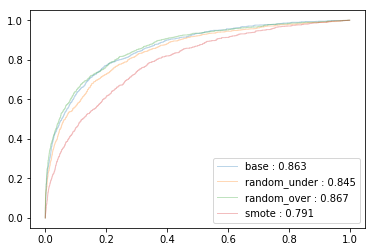

,models,auc_score
0,base,0.862836
1,random_under,0.844912
2,random_over,0.867254
3,smote,0.790520


In [26]:
plotGraph(result_df)

In [100]:
pred = m.predict(test)

In [16]:
sub['target'] = pred
sub.to_csv("../data/ten_rounds_sub.csv",index=False)

In [26]:
number_of_time

In [15]:
pred

array([0.20079042, 0.24893302, 0.36773558, ..., 0.02702318, 0.28746883,
       0.19623194])